# Chapter 8: Probability Distributions

In this chapter, we'll explore probability distributions, which are mathematical functions that describe the likelihood of different outcomes in a random experiment. Understanding probability distributions is essential for statistical inference, hypothesis testing, and modeling random phenomena in psychological research.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Set matplotlib parameters
plt.rcParams['figure.dpi'] = 300  # High resolution figures
plt.rcParams['axes.grid'] = False  # No grid
plt.rcParams['font.size'] = 12  # Base font size
plt.rcParams['axes.labelsize'] = 14  # Axis label size
plt.rcParams['axes.titlesize'] = 16  # Title size
plt.rcParams['xtick.labelsize'] = 12  # X-tick label size
plt.rcParams['ytick.labelsize'] = 12  # Y-tick label size
plt.rcParams['legend.fontsize'] = 12  # Legend font size
plt.rcParams['figure.titlesize'] = 18  # Figure title size

# Set seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook")

## 1. Introduction to Probability Distributions

A probability distribution is a mathematical function that provides the probabilities of different possible outcomes of a random phenomenon. In psychological research, we encounter both discrete and continuous probability distributions.

### Types of Probability Distributions

1. **Discrete Probability Distributions**
   - Deal with random variables that can only take specific, separate values
   - Examples: number of participants who respond correctly, number of symptoms reported
   - Key distributions: Binomial, Poisson, Negative Binomial

2. **Continuous Probability Distributions**
   - Deal with random variables that can take any value within a range
   - Examples: reaction times, test scores, physiological measurements
   - Key distributions: Normal, t, F, Chi-square

### Key Concepts

- **Probability Mass Function (PMF)**: For discrete distributions, gives the probability of each possible value
- **Probability Density Function (PDF)**: For continuous distributions, describes the relative likelihood of different values
- **Cumulative Distribution Function (CDF)**: Gives the probability that a random variable is less than or equal to a certain value
- **Expected Value (Mean)**: The long-run average value of the random variable
- **Variance**: A measure of the spread or dispersion of the distribution

Let's explore these distributions and their applications in psychological research.

## 2. Discrete Probability Distributions

Discrete probability distributions describe random variables that can only take specific, countable values. In psychological research, these often represent counts or frequencies.

### 2.1 Bernoulli Distribution

The Bernoulli distribution is the simplest discrete probability distribution, modeling a single binary outcome (success/failure).

**Key Properties:**
- Models a single trial with two possible outcomes (success or failure)
- Has a single parameter $p$ (probability of success)
- Mean: $\mu = p$
- Variance: $\sigma^2 = p(1-p)$

**Psychological Applications:**
- Modeling whether a participant correctly responds to a single trial
- Representing whether a participant experiences a specific symptom
- Modeling binary decisions (yes/no, agree/disagree)

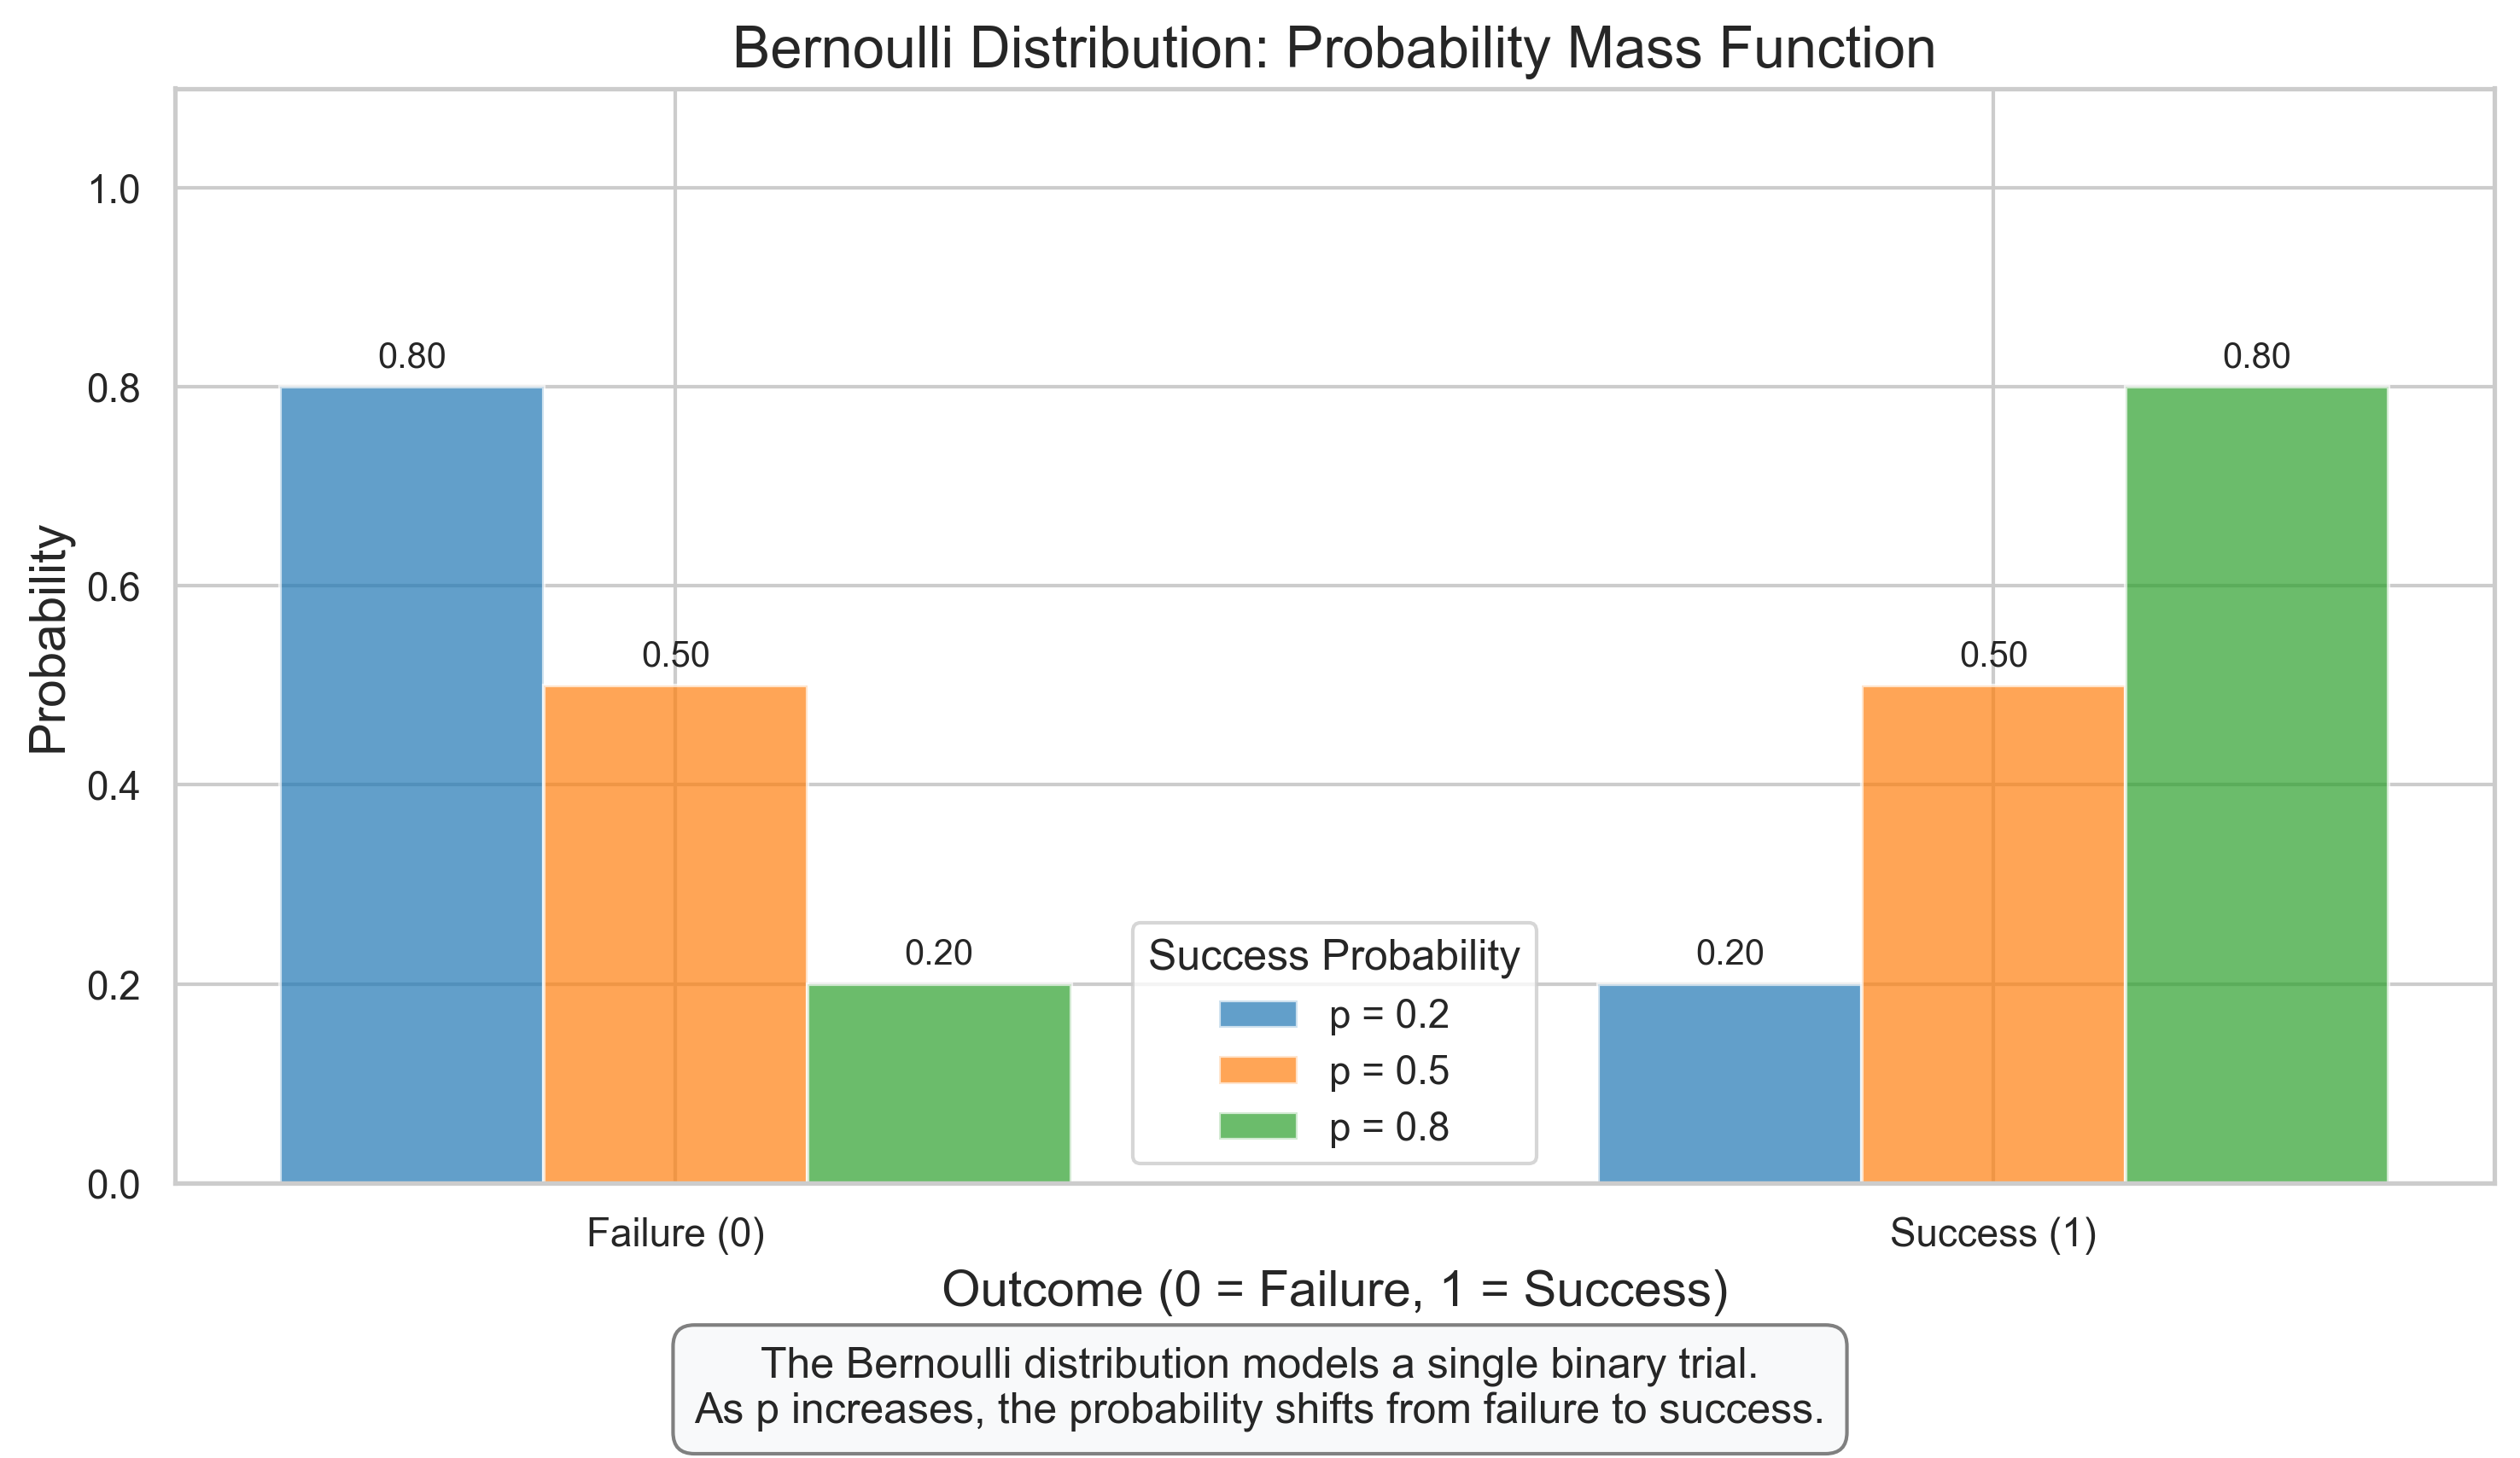

In [2]:
# Bernoulli Distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Define success probabilities
p_values = [0.2, 0.5, 0.8]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
x = np.array([0, 1])

# Plot PMF for different p values
for i, p in enumerate(p_values):
    pmf = [1-p, p]  # Probability of failure (0) and success (1)
    ax.bar(x + i*0.2 - 0.2, pmf, width=0.2, alpha=0.7, color=colors[i], label=f'p = {p}')
    
    # Add text labels
    for j, prob in enumerate(pmf):
        ax.text(j + i*0.2 - 0.2, prob + 0.02, f'{prob:.2f}', ha='center', fontsize=10)

# Add labels and title
ax.set_title('Bernoulli Distribution: Probability Mass Function', fontsize=16)
ax.set_xlabel('Outcome (0 = Failure, 1 = Success)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Failure (0)', 'Success (1)'])
ax.set_ylim(0, 1.1)
ax.legend(title='Success Probability')

# Add explanatory text
plt.figtext(0.5, 0.01, "The Bernoulli distribution models a single binary trial.\n"
                      "As p increases, the probability shifts from failure to success.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

### 2.2 Binomial Distribution

The binomial distribution models the number of successes in a fixed number of independent Bernoulli trials.

**Key Properties:**
- Models the number of successes in $n$ independent trials
- Has two parameters: $n$ (number of trials) and $p$ (probability of success on each trial)
- Mean: $\mu = np$
- Variance: $\sigma^2 = np(1-p)$
- PMF: $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$

**Psychological Applications:**
- Number of correct responses in a memory test with $n$ items
- Number of participants (out of $n$) who report a specific experience
- Number of successful trials in a learning experiment

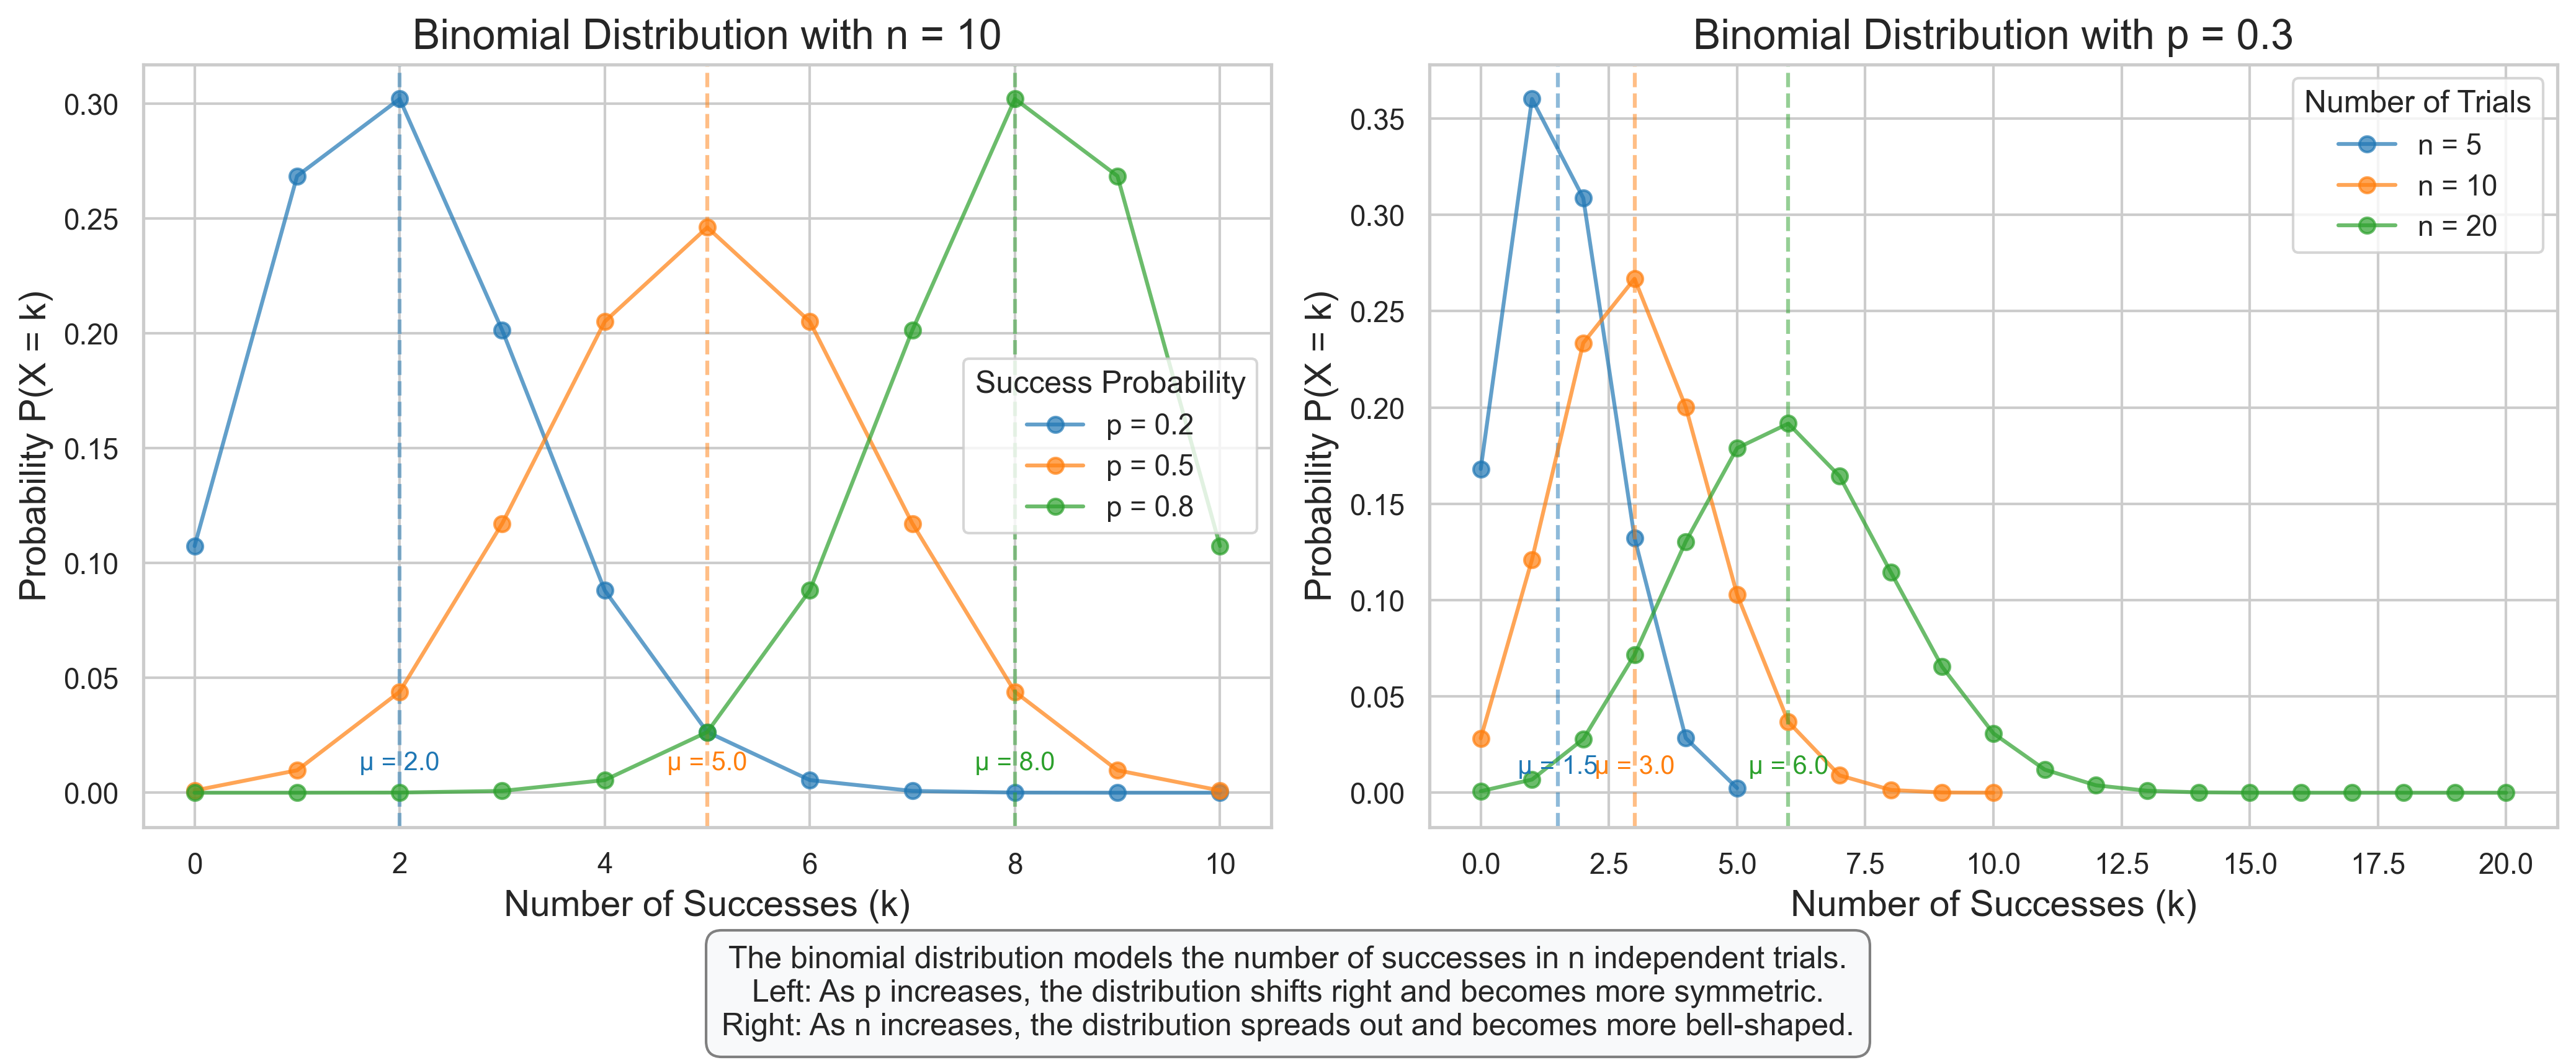

In [3]:
# Binomial Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Varying p with fixed n
n = 10  # Fixed number of trials
p_values = [0.2, 0.5, 0.8]  # Different success probabilities
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
x = np.arange(0, n+1)

for i, p in enumerate(p_values):
    # Calculate PMF
    pmf = stats.binom.pmf(x, n, p)
    
    # Plot PMF
    axes[0].plot(x, pmf, 'o-', color=colors[i], label=f'p = {p}', alpha=0.7, markersize=6)
    
    # Add mean line
    mean = n * p
    axes[0].axvline(mean, color=colors[i], linestyle='--', alpha=0.5)
    axes[0].text(mean, 0.01, f'μ = {mean:.1f}', color=colors[i], ha='center', fontsize=10)

axes[0].set_title(f'Binomial Distribution with n = {n}', fontsize=16)
axes[0].set_xlabel('Number of Successes (k)', fontsize=14)
axes[0].set_ylabel('Probability P(X = k)', fontsize=14)
axes[0].legend(title='Success Probability')

# Plot 2: Varying n with fixed p
p = 0.3  # Fixed success probability
n_values = [5, 10, 20]  # Different numbers of trials
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, n in enumerate(n_values):
    # Calculate PMF
    x = np.arange(0, n+1)
    pmf = stats.binom.pmf(x, n, p)
    
    # Plot PMF
    axes[1].plot(x, pmf, 'o-', color=colors[i], label=f'n = {n}', alpha=0.7, markersize=6)
    
    # Add mean line
    mean = n * p
    axes[1].axvline(mean, color=colors[i], linestyle='--', alpha=0.5)
    axes[1].text(mean, 0.01, f'μ = {mean:.1f}', color=colors[i], ha='center', fontsize=10)

axes[1].set_title(f'Binomial Distribution with p = {p}', fontsize=16)
axes[1].set_xlabel('Number of Successes (k)', fontsize=14)
axes[1].set_ylabel('Probability P(X = k)', fontsize=14)
axes[1].legend(title='Number of Trials')

# Add explanatory text
plt.figtext(0.5, 0.01, "The binomial distribution models the number of successes in n independent trials.\n"
                      "Left: As p increases, the distribution shifts right and becomes more symmetric.\n"
                      "Right: As n increases, the distribution spreads out and becomes more bell-shaped.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 2.3 Poisson Distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space, assuming these events occur independently at a constant average rate.

**Key Properties:**
- Models the number of events in a fixed interval
- Has one parameter: $\lambda$ (average rate of events)
- Mean: $\mu = \lambda$
- Variance: $\sigma^2 = \lambda$
- PMF: $P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$

**Psychological Applications:**
- Number of errors made in a fixed time period
- Number of intrusive thoughts reported in a day
- Number of participants arriving at a lab in a given hour
- Number of words recalled in a memory task

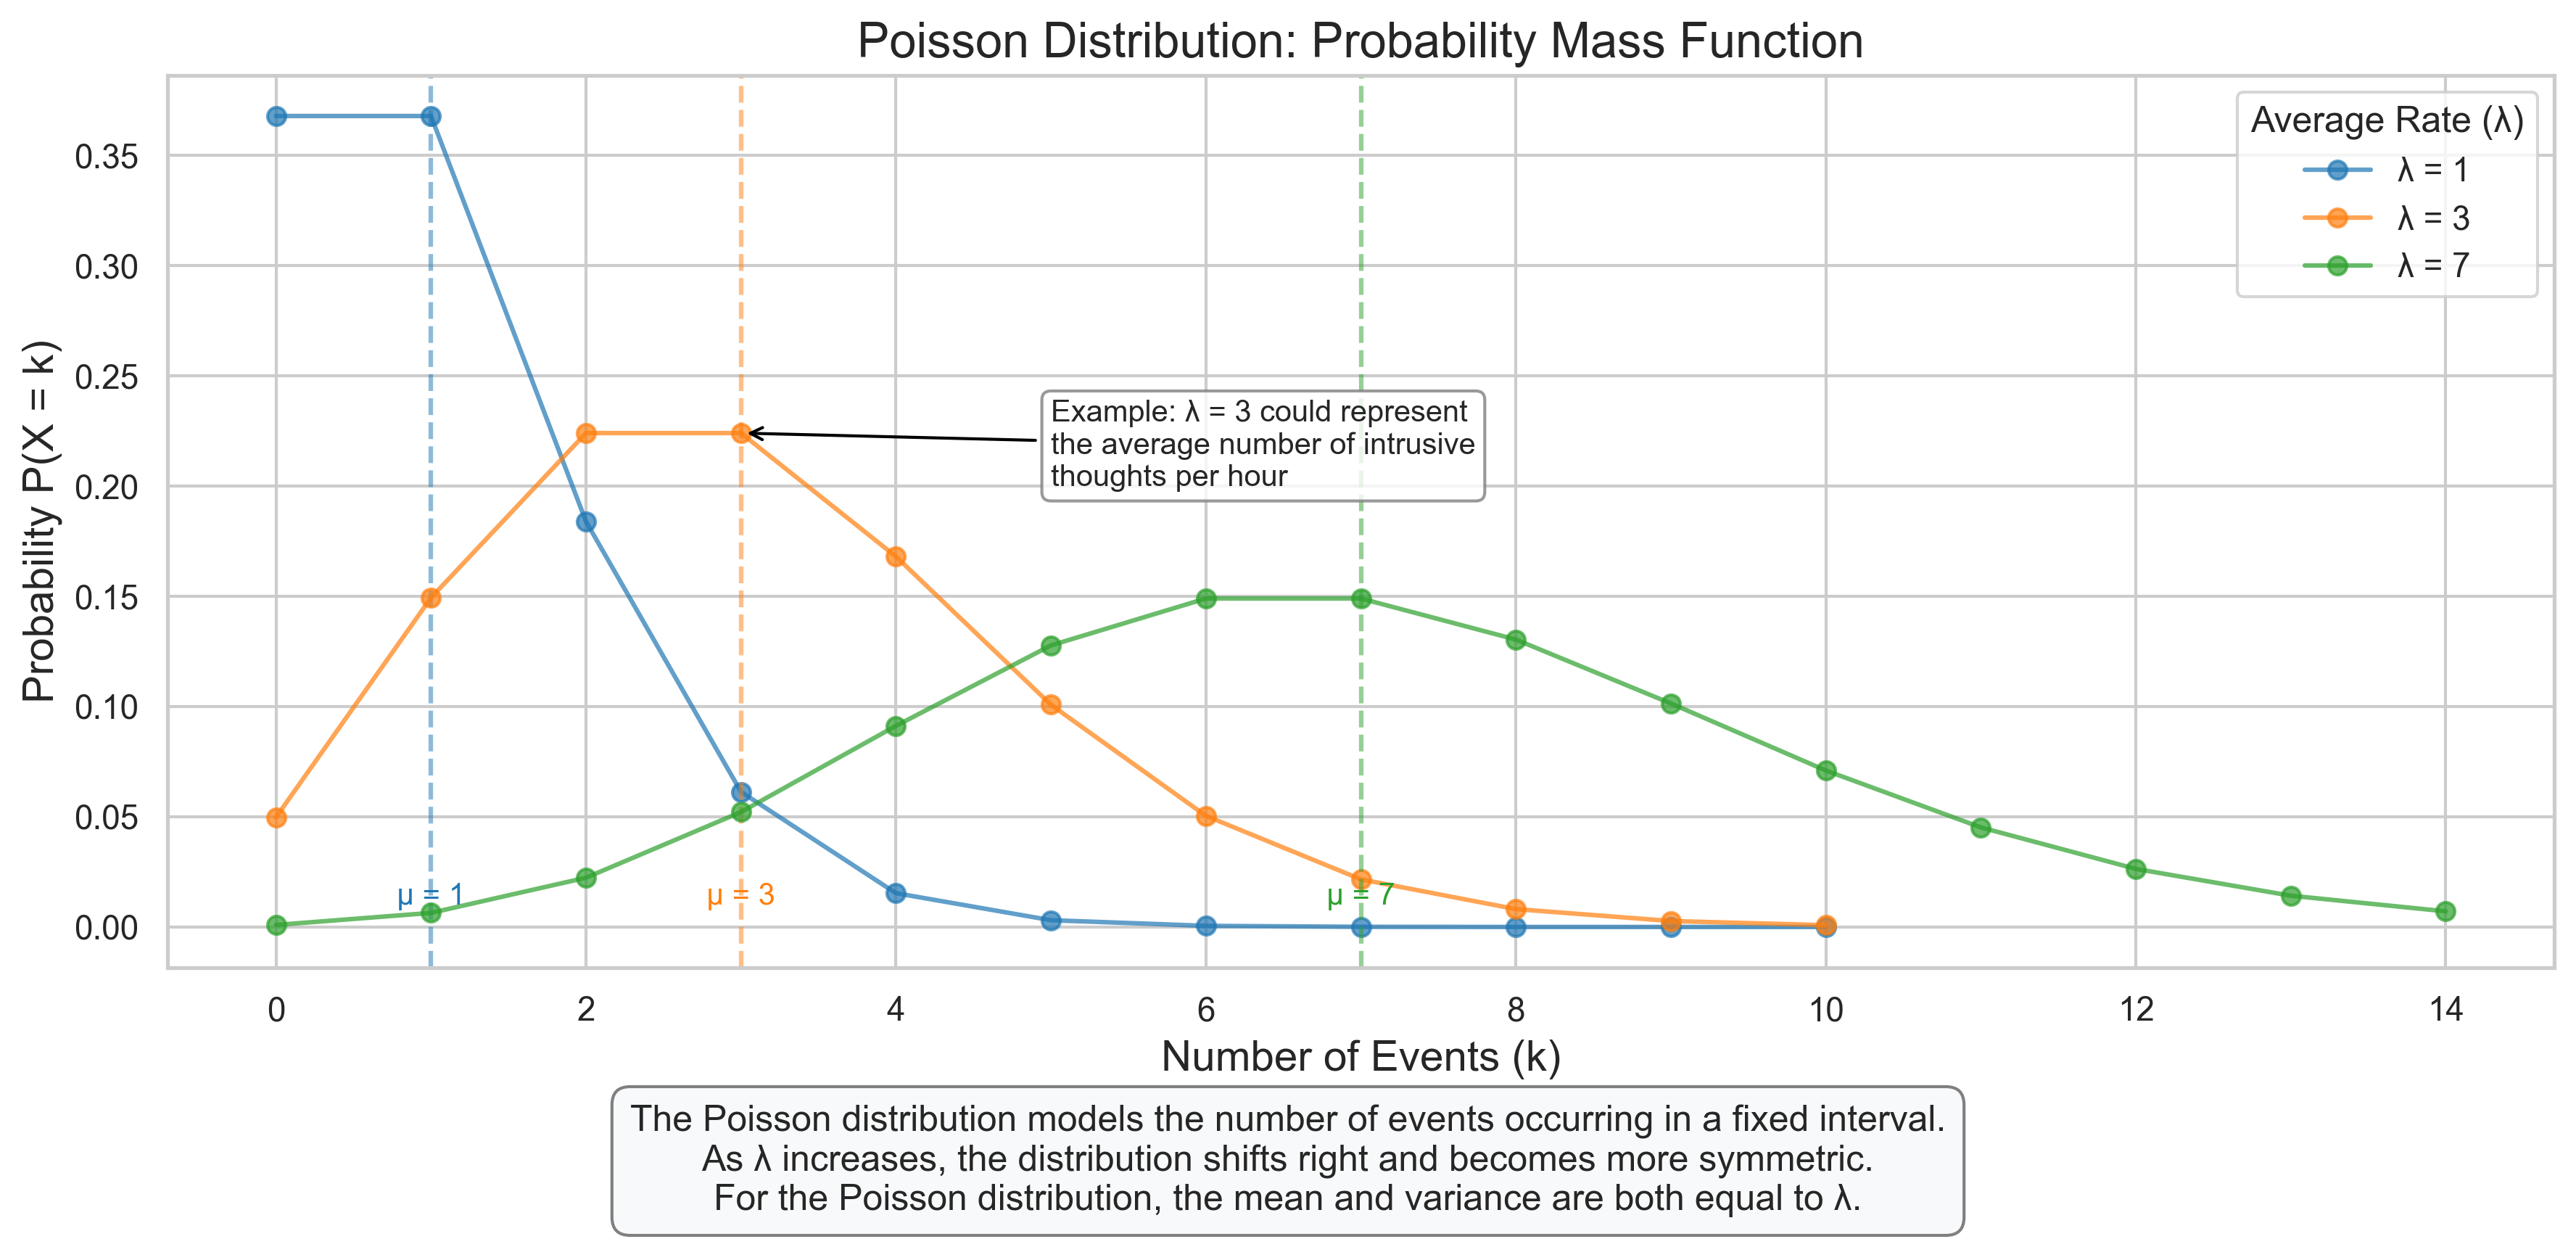

In [4]:
# Poisson Distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Define lambda values (average rate)
lambda_values = [1, 3, 7]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot PMF for different lambda values
for i, lam in enumerate(lambda_values):
    # Calculate the appropriate range for x (up to where probability becomes very small)
    x_max = max(10, int(lam * 2))
    x = np.arange(0, x_max + 1)
    
    # Calculate PMF
    pmf = stats.poisson.pmf(x, lam)
    
    # Plot PMF
    ax.plot(x, pmf, 'o-', color=colors[i], label=f'λ = {lam}', alpha=0.7, markersize=6)
    
    # Add mean line
    ax.axvline(lam, color=colors[i], linestyle='--', alpha=0.5)
    ax.text(lam, 0.01, f'μ = {lam}', color=colors[i], ha='center', fontsize=10)

# Add labels and title
ax.set_title('Poisson Distribution: Probability Mass Function', fontsize=16)
ax.set_xlabel('Number of Events (k)', fontsize=14)
ax.set_ylabel('Probability P(X = k)', fontsize=14)
ax.legend(title='Average Rate (λ)')

# Add psychological example annotation
ax.annotate('Example: λ = 3 could represent\nthe average number of intrusive\nthoughts per hour', 
            xy=(3, stats.poisson.pmf(3, 3)), xytext=(5, 0.2),
            arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "The Poisson distribution models the number of events occurring in a fixed interval.\n"
                      "As λ increases, the distribution shifts right and becomes more symmetric.\n"
                      "For the Poisson distribution, the mean and variance are both equal to λ.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 2.4 Psychological Example: Modeling Response Patterns

Let's apply discrete distributions to model response patterns in a psychological experiment.

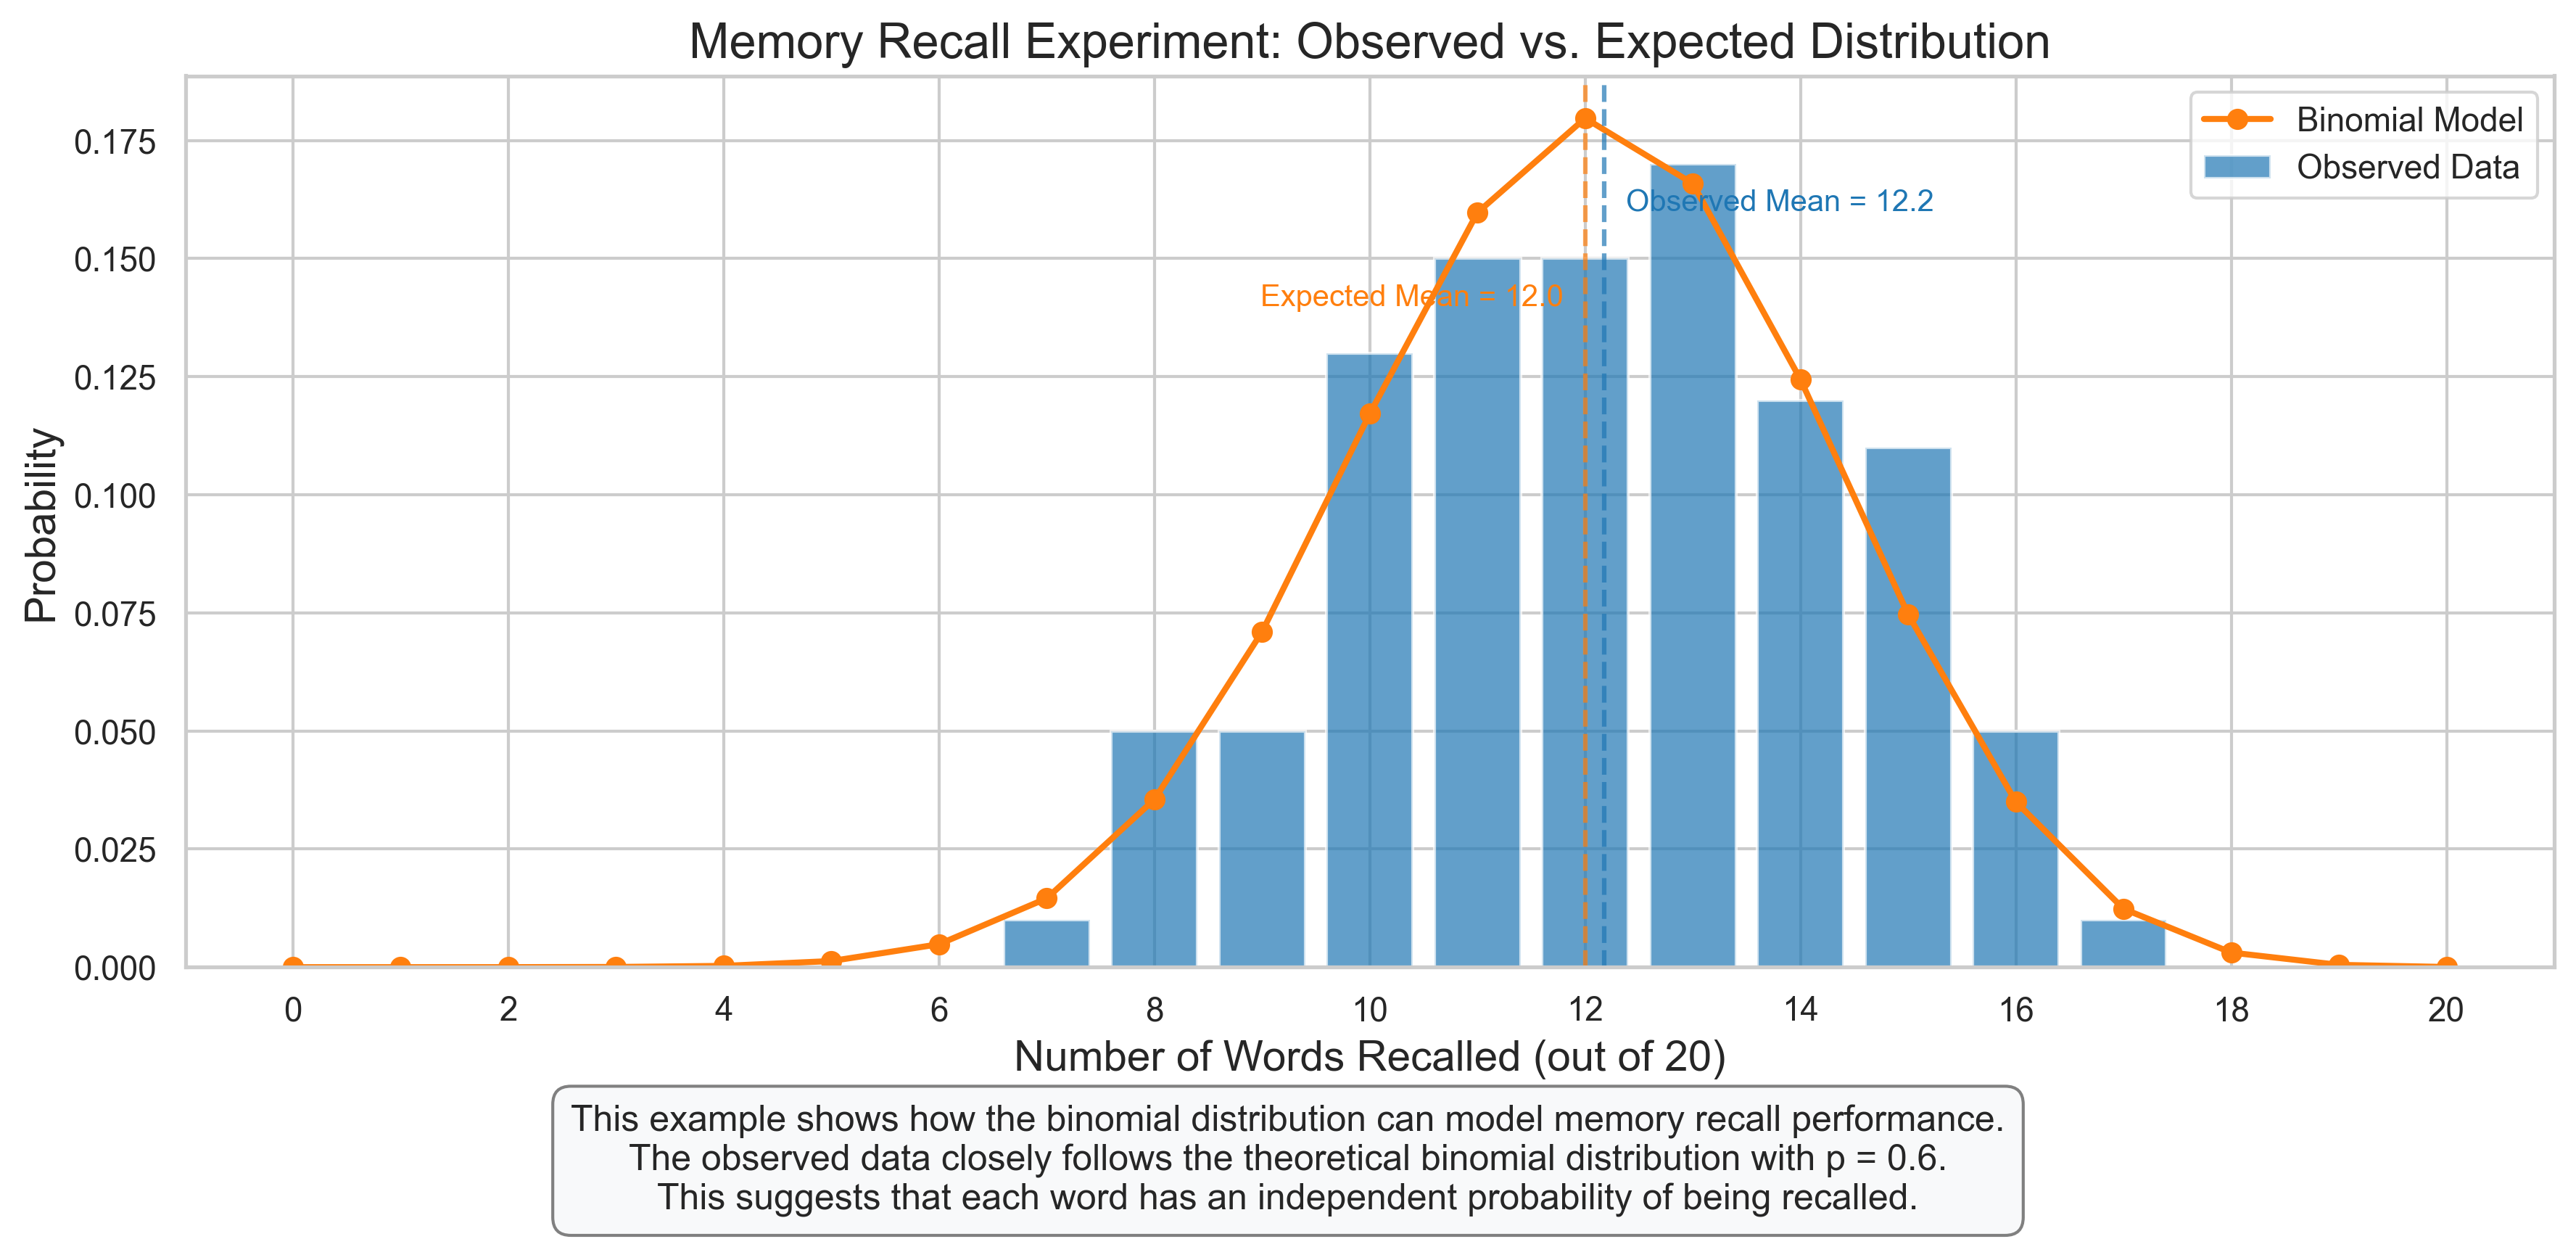

In [5]:
# Psychological Example: Memory Recall Experiment
# Simulate data from a memory experiment where participants are shown 20 words and asked to recall as many as possible

# Parameters
n_words = 20  # Number of words presented
n_participants = 100  # Number of participants
p_recall = 0.6  # Average probability of recalling each word

# Simulate data using binomial distribution (each participant has a binomial distribution of recalled words)
recalled_words = np.random.binomial(n_words, p_recall, n_participants)

# Create a DataFrame
df_memory = pd.DataFrame({
    'Participant': range(1, n_participants + 1),
    'Words_Recalled': recalled_words
})

# Calculate observed frequencies
observed_freq = df_memory['Words_Recalled'].value_counts().sort_index()
observed_prob = observed_freq / n_participants

# Calculate expected probabilities from binomial distribution
x = np.arange(0, n_words + 1)
expected_prob = stats.binom.pmf(x, n_words, p_recall)

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Plot observed frequencies
ax.bar(observed_prob.index, observed_prob.values, alpha=0.7, label='Observed Data', color='#1f77b4', width=0.8)

# Plot expected probabilities
ax.plot(x, expected_prob, 'o-', color='#ff7f0e', label='Binomial Model', linewidth=2, markersize=6)

# Add mean lines
observed_mean = df_memory['Words_Recalled'].mean()
expected_mean = n_words * p_recall

ax.axvline(observed_mean, color='#1f77b4', linestyle='--', alpha=0.7)
ax.text(observed_mean + 0.2, 0.16, f'Observed Mean = {observed_mean:.1f}', color='#1f77b4', fontsize=10)

ax.axvline(expected_mean, color='#ff7f0e', linestyle='--', alpha=0.7)
ax.text(expected_mean - 0.2, 0.14, f'Expected Mean = {expected_mean:.1f}', color='#ff7f0e', ha='right', fontsize=10)

# Add labels and title
ax.set_title('Memory Recall Experiment: Observed vs. Expected Distribution', fontsize=16)
ax.set_xlabel('Number of Words Recalled (out of 20)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_xticks(range(0, n_words + 1, 2))
ax.legend()

# Add explanatory text
plt.figtext(0.5, 0.01, "This example shows how the binomial distribution can model memory recall performance.\n"
                      "The observed data closely follows the theoretical binomial distribution with p = 0.6.\n"
                      "This suggests that each word has an independent probability of being recalled.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## 3. Continuous Probability Distributions

Continuous probability distributions describe random variables that can take any value within a range. In psychological research, these often represent measurements like reaction times, test scores, or physiological readings.

### 3.1 Normal (Gaussian) Distribution

The normal distribution is the most important continuous probability distribution in statistics, often used to model natural phenomena and measurement error.

**Key Properties:**
- Bell-shaped, symmetric around the mean
- Has two parameters: $\mu$ (mean) and $\sigma$ (standard deviation)
- PDF: $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$
- 68-95-99.7 rule: approximately 68% of data falls within 1 SD of the mean, 95% within 2 SD, and 99.7% within 3 SD

**Psychological Applications:**
- Distribution of IQ scores (standardized to $\mu = 100$, $\sigma = 15$)
- Distribution of personality trait scores in a population
- Measurement error in psychological assessments
- Reaction times (after appropriate transformation)

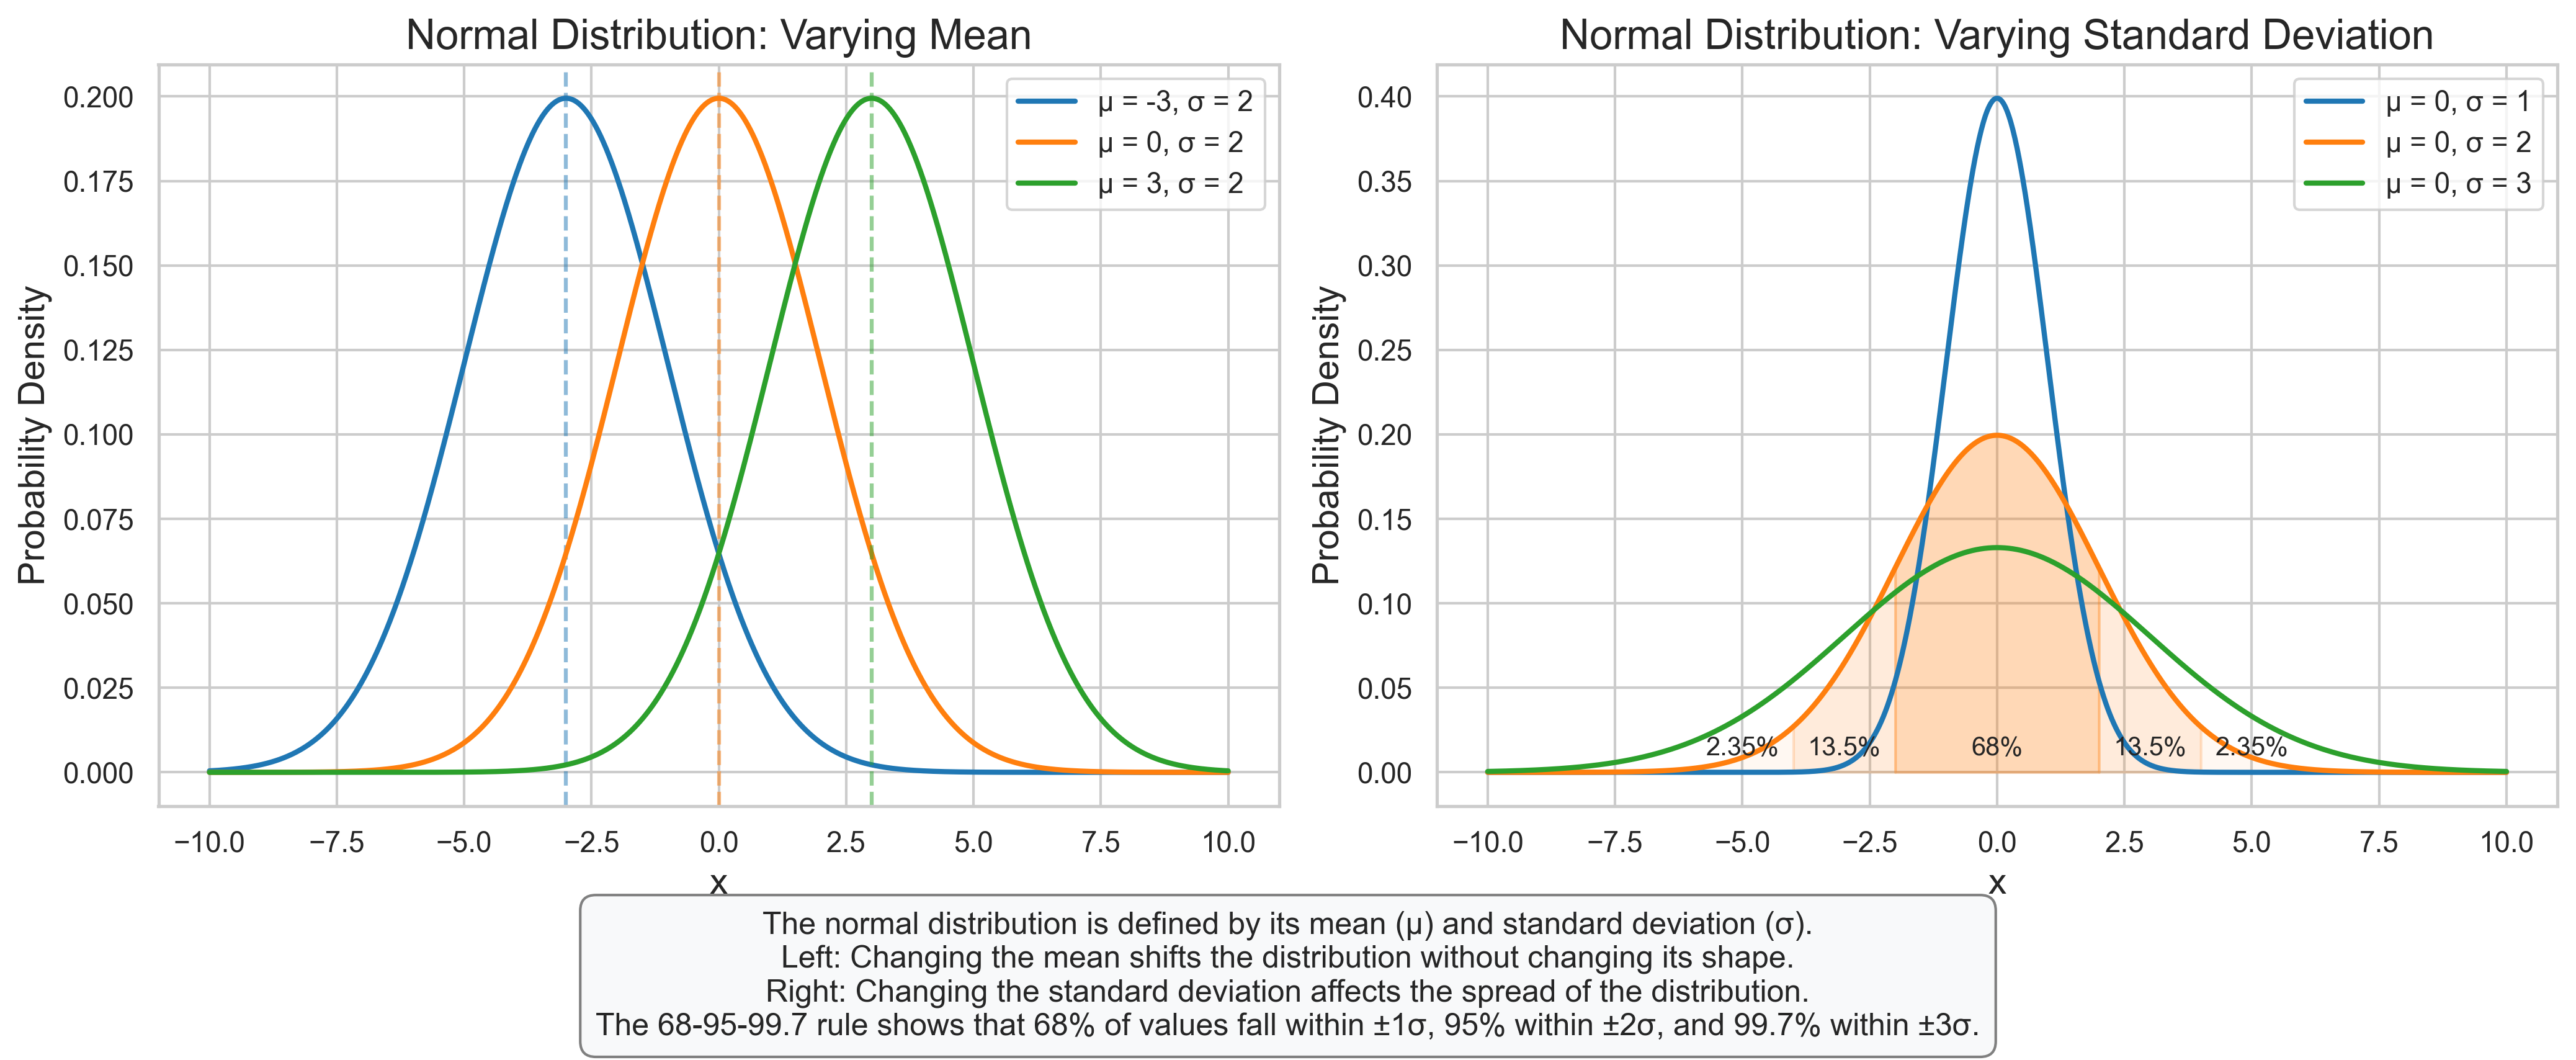

In [6]:
# Normal Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Varying mean with fixed standard deviation
x = np.linspace(-10, 10, 1000)
sigma = 2  # Fixed standard deviation
mu_values = [-3, 0, 3]  # Different means
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, mu in enumerate(mu_values):
    # Calculate PDF
    pdf = stats.norm.pdf(x, mu, sigma)
    
    # Plot PDF
    axes[0].plot(x, pdf, color=colors[i], label=f'μ = {mu}, σ = {sigma}', linewidth=2)
    
    # Add vertical line at mean
    axes[0].axvline(mu, color=colors[i], linestyle='--', alpha=0.5)

axes[0].set_title('Normal Distribution: Varying Mean', fontsize=16)
axes[0].set_xlabel('x', fontsize=14)
axes[0].set_ylabel('Probability Density', fontsize=14)
axes[0].legend()

# Plot 2: Varying standard deviation with fixed mean
mu = 0  # Fixed mean
sigma_values = [1, 2, 3]  # Different standard deviations
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, sigma in enumerate(sigma_values):
    # Calculate PDF
    pdf = stats.norm.pdf(x, mu, sigma)
    
    # Plot PDF
    axes[1].plot(x, pdf, color=colors[i], label=f'μ = {mu}, σ = {sigma}', linewidth=2)
    
    # Shade regions for 68-95-99.7 rule (for the middle curve only)
    if i == 1:  # For sigma = 2
        # 68% region (±1σ)
        x_fill = np.linspace(mu - sigma, mu + sigma, 100)
        axes[1].fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), alpha=0.3, color=colors[i])
        axes[1].text(mu, 0.01, "68%", ha='center', fontsize=10)
        
        # 95% region (±2σ)
        x_fill = np.linspace(mu - 2*sigma, mu - sigma, 100)
        axes[1].fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), alpha=0.15, color=colors[i])
        x_fill = np.linspace(mu + sigma, mu + 2*sigma, 100)
        axes[1].fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), alpha=0.15, color=colors[i])
        axes[1].text(mu - 1.5*sigma, 0.01, "13.5%", ha='center', fontsize=10)
        axes[1].text(mu + 1.5*sigma, 0.01, "13.5%", ha='center', fontsize=10)
        
        # 99.7% region (±3σ)
        x_fill = np.linspace(mu - 3*sigma, mu - 2*sigma, 100)
        axes[1].fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), alpha=0.05, color=colors[i])
        x_fill = np.linspace(mu + 2*sigma, mu + 3*sigma, 100)
        axes[1].fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), alpha=0.05, color=colors[i])
        axes[1].text(mu - 2.5*sigma, 0.01, "2.35%", ha='center', fontsize=10)
        axes[1].text(mu + 2.5*sigma, 0.01, "2.35%", ha='center', fontsize=10)

axes[1].set_title('Normal Distribution: Varying Standard Deviation', fontsize=16)
axes[1].set_xlabel('x', fontsize=14)
axes[1].set_ylabel('Probability Density', fontsize=14)
axes[1].legend()

# Add explanatory text
plt.figtext(0.5, 0.01, "The normal distribution is defined by its mean (μ) and standard deviation (σ).\n"
                      "Left: Changing the mean shifts the distribution without changing its shape.\n"
                      "Right: Changing the standard deviation affects the spread of the distribution.\n"
                      "The 68-95-99.7 rule shows that 68% of values fall within ±1σ, 95% within ±2σ, and 99.7% within ±3σ.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

### 3.2 Standard Normal Distribution and Z-scores

The standard normal distribution is a special case of the normal distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$. It serves as a reference distribution for standardizing normal random variables.

**Key Properties:**
- Mean = 0, Standard Deviation = 1
- Symmetric around zero
- Z-scores represent the number of standard deviations a value is from the mean
- Formula for Z-score: $Z = \frac{X - \mu}{\sigma}$

**Psychological Applications:**
- Standardizing test scores for comparison
- Determining percentile ranks
- Identifying outliers in psychological measurements
- Comparing scores from different psychological assessments

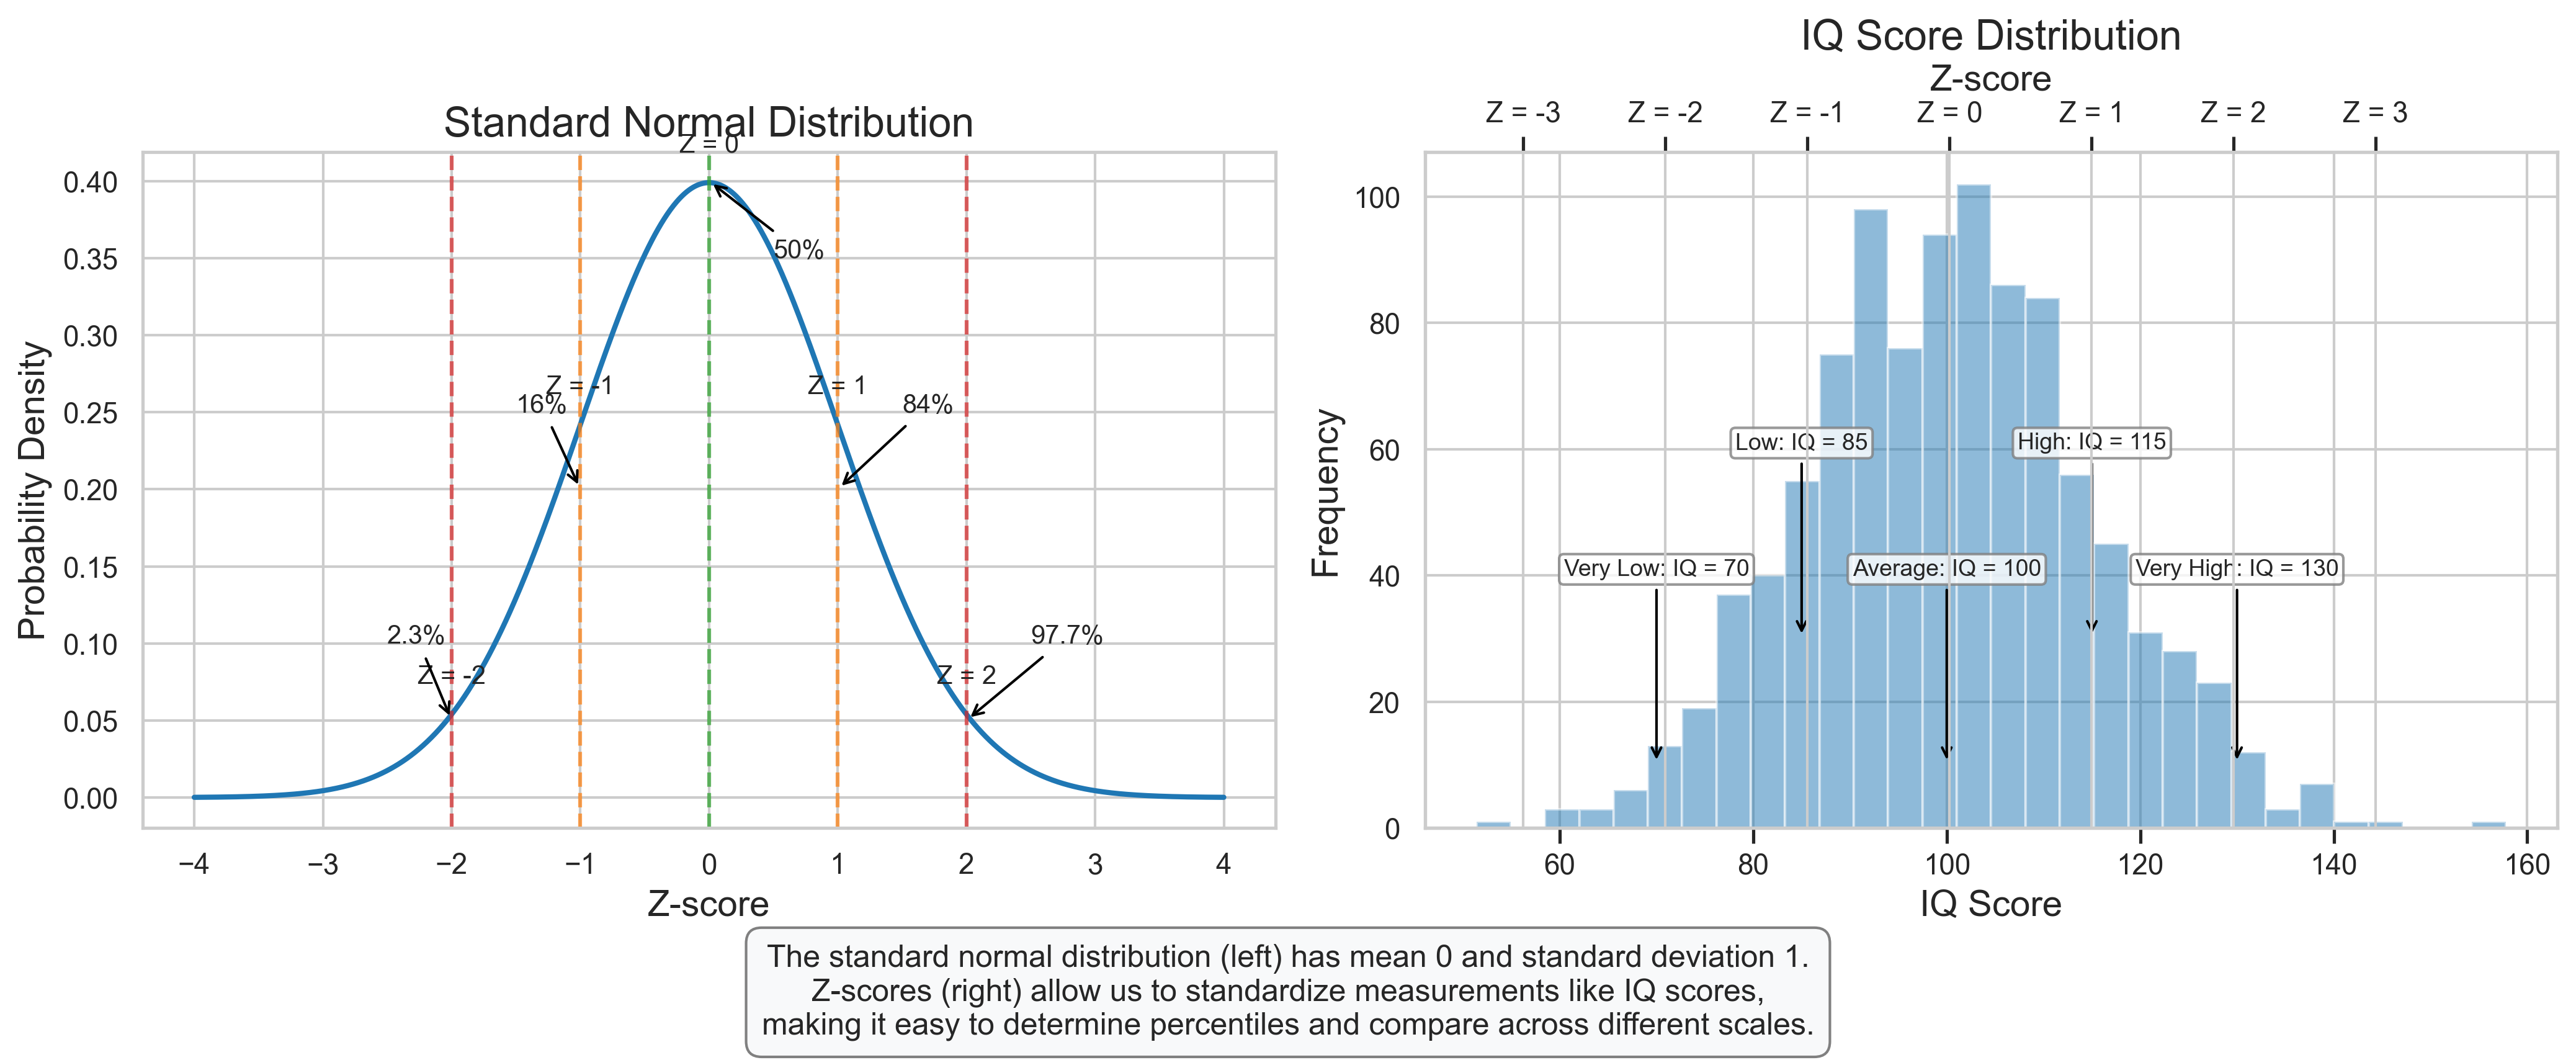

In [7]:
# Standard Normal Distribution and Z-scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Standard Normal Distribution
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, 0, 1)

axes[0].plot(x, pdf, color='#1f77b4', linewidth=2)
axes[0].set_title('Standard Normal Distribution', fontsize=16)
axes[0].set_xlabel('Z-score', fontsize=14)
axes[0].set_ylabel('Probability Density', fontsize=14)

# Add vertical lines at key Z-scores
for z, label, color in zip([-2, -1, 0, 1, 2], ['Z = -2', 'Z = -1', 'Z = 0', 'Z = 1', 'Z = 2'], 
                          ['#d62728', '#ff7f0e', '#2ca02c', '#ff7f0e', '#d62728']):
    axes[0].axvline(z, color=color, linestyle='--', alpha=0.7)
    axes[0].text(z, stats.norm.pdf(z, 0, 1) + 0.02, label, ha='center', fontsize=10)

# Add percentile annotations
axes[0].annotate('2.3%', xy=(-2, 0.05), xytext=(-2.5, 0.1), 
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
axes[0].annotate('16%', xy=(-1, 0.2), xytext=(-1.5, 0.25), 
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
axes[0].annotate('50%', xy=(0, 0.4), xytext=(0.5, 0.35), 
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
axes[0].annotate('84%', xy=(1, 0.2), xytext=(1.5, 0.25), 
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
axes[0].annotate('97.7%', xy=(2, 0.05), xytext=(2.5, 0.1), 
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Plot 2: Converting to Z-scores
# Generate some IQ scores (normally distributed with mean=100, sd=15)
np.random.seed(42)
iq_scores = np.random.normal(100, 15, 1000)

# Convert to Z-scores
z_scores = (iq_scores - np.mean(iq_scores)) / np.std(iq_scores)

# Plot histograms
axes[1].hist(iq_scores, bins=30, alpha=0.5, color='#1f77b4', label='IQ Scores')
axes[1].set_xlabel('IQ Score', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].set_title('IQ Score Distribution', fontsize=16)

# Create a twin axis for Z-scores
ax2 = axes[1].twiny()
ax2.set_xlim(axes[1].get_xlim())
z_ticks = np.array([-3, -2, -1, 0, 1, 2, 3])
iq_ticks = z_ticks * np.std(iq_scores) + np.mean(iq_scores)
ax2.set_xticks(iq_ticks)
ax2.set_xticklabels([f'Z = {z}' for z in z_ticks])
ax2.set_xlabel('Z-score', fontsize=14)

# Add annotations for specific IQ scores
for iq, label in zip([70, 85, 100, 115, 130], ['Very Low', 'Low', 'Average', 'High', 'Very High']):
    z = (iq - np.mean(iq_scores)) / np.std(iq_scores)
    y_pos = 10 + (iq % 2) * 20  # Alternate y positions to avoid overlap
    axes[1].annotate(f'{label}: IQ = {iq}', xy=(iq, y_pos), xytext=(iq, y_pos + 30),
                    arrowprops=dict(arrowstyle='->', color='black'), fontsize=9,
                    ha='center', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "The standard normal distribution (left) has mean 0 and standard deviation 1.\n"
                      "Z-scores (right) allow us to standardize measurements like IQ scores,\n"
                      "making it easy to determine percentiles and compare across different scales.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 3.3 t-Distribution

The t-distribution is similar to the normal distribution but has heavier tails. It is used when the population standard deviation is unknown and must be estimated from the sample.

**Key Properties:**
- Shape determined by degrees of freedom (df)
- As df increases, approaches the standard normal distribution
- Symmetric around zero
- Heavier tails than the normal distribution

**Psychological Applications:**
- Confidence intervals for means with small samples
- t-tests for comparing group means
- Statistical inference with small sample sizes

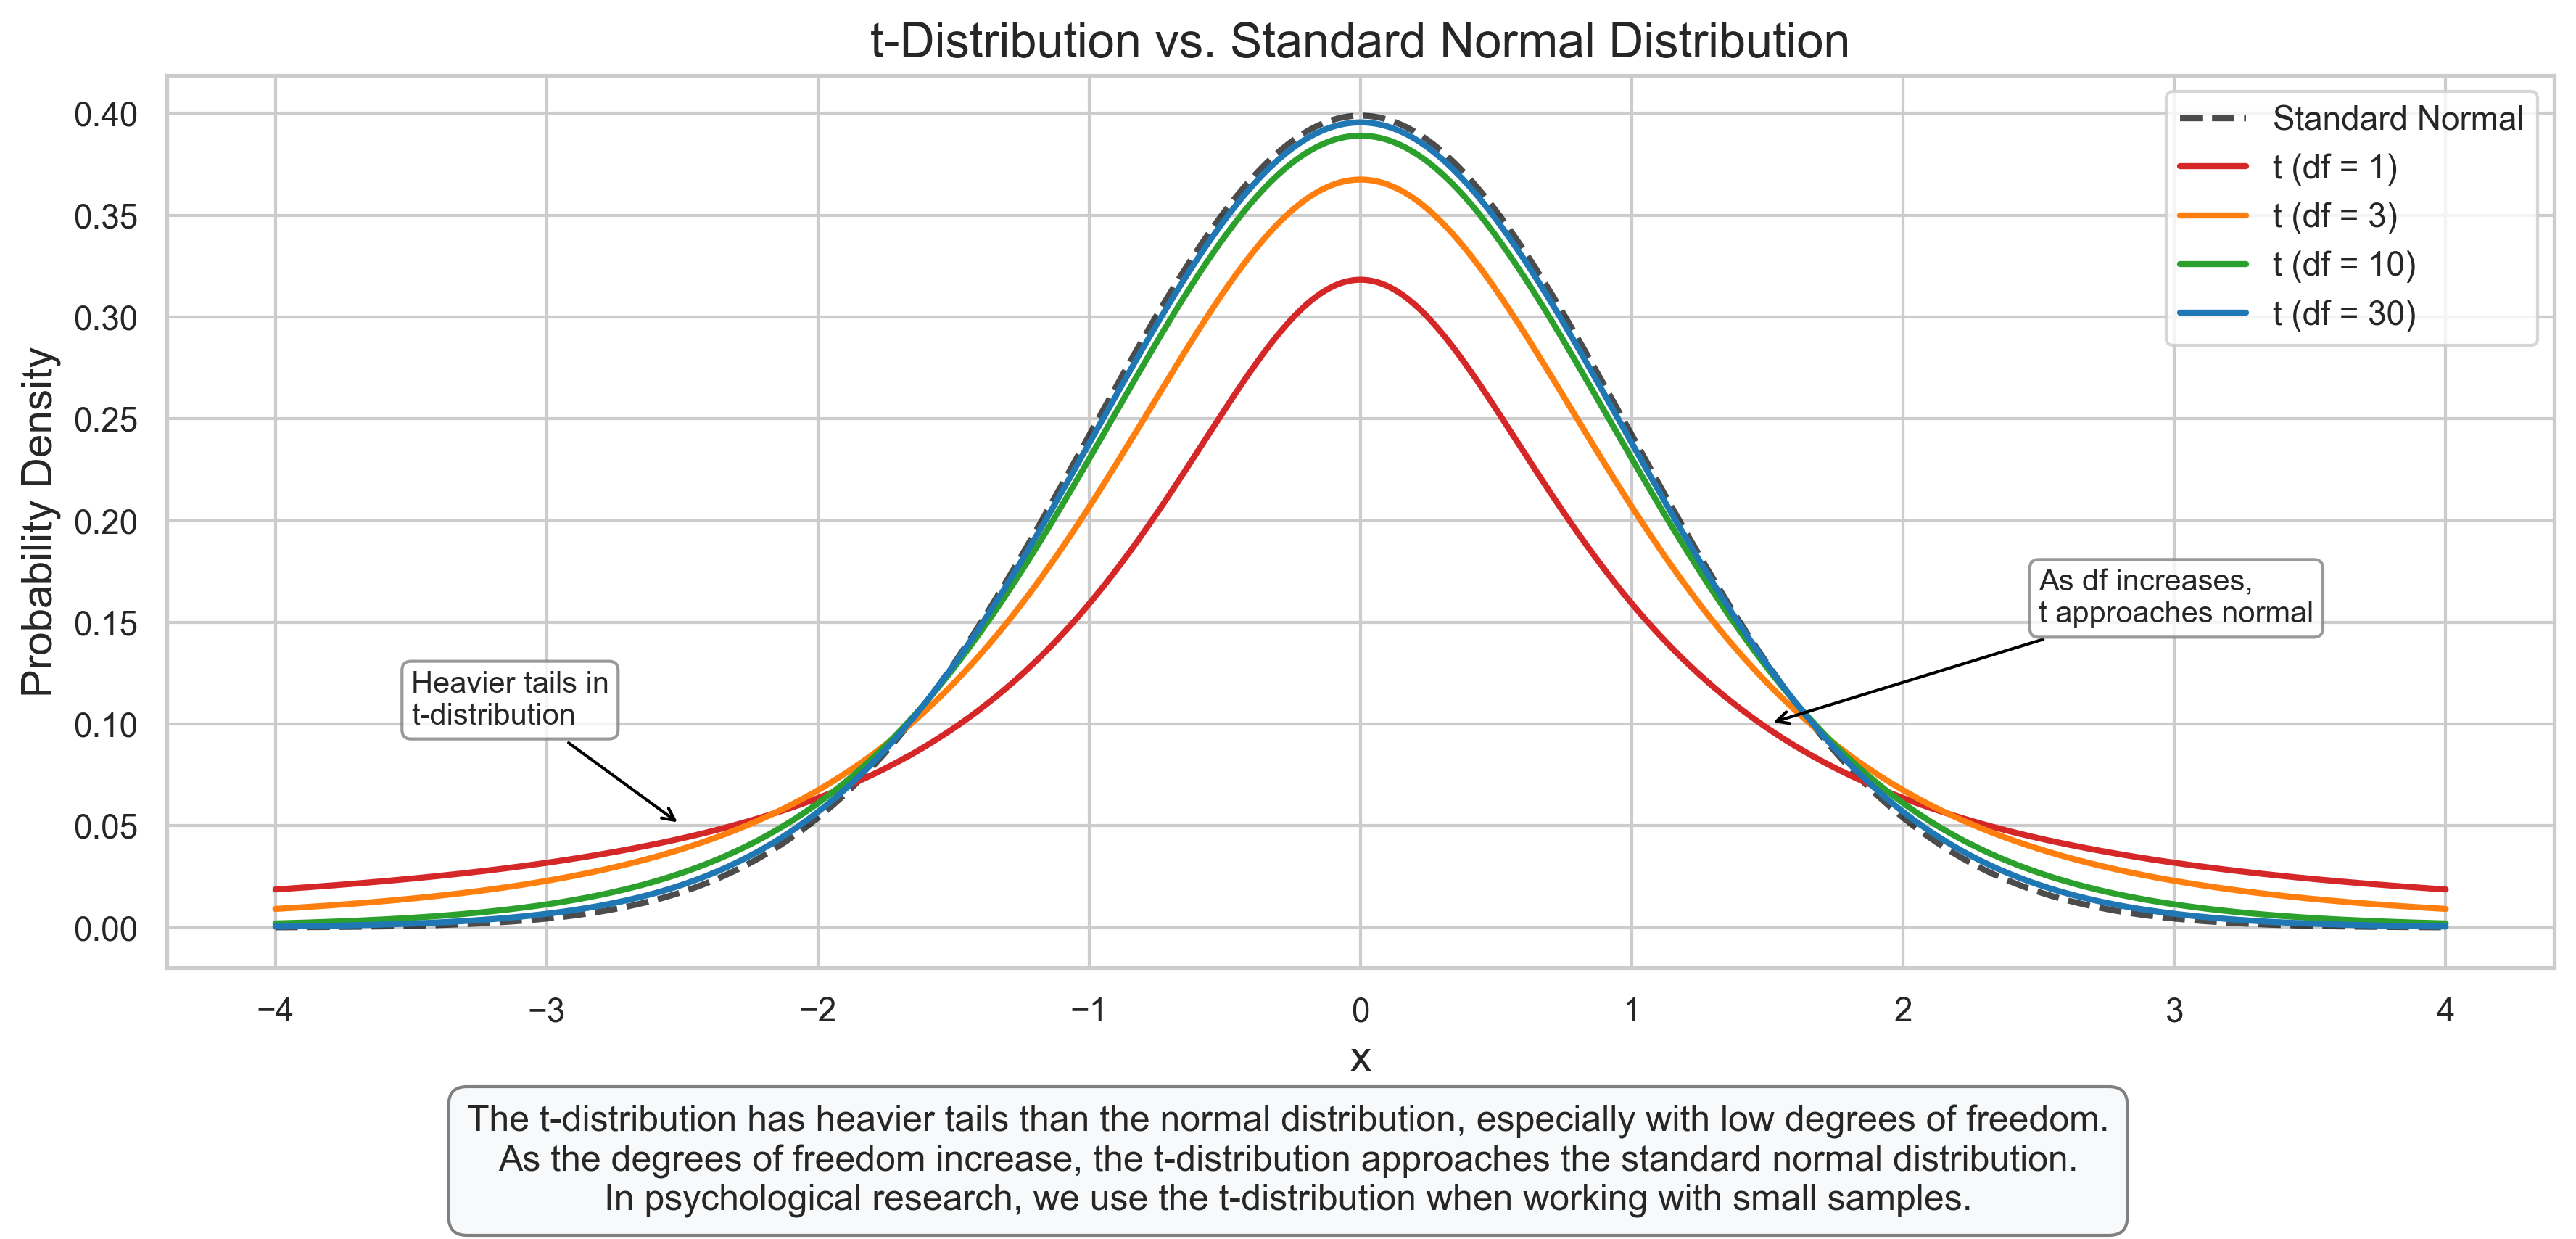

In [8]:
# t-Distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Define x range
x = np.linspace(-4, 4, 1000)

# Plot standard normal distribution for comparison
normal_pdf = stats.norm.pdf(x, 0, 1)
ax.plot(x, normal_pdf, 'k--', label='Standard Normal', linewidth=2, alpha=0.7)

# Plot t-distributions with different degrees of freedom
df_values = [1, 3, 10, 30]
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']

for i, df in enumerate(df_values):
    t_pdf = stats.t.pdf(x, df)
    ax.plot(x, t_pdf, color=colors[i], label=f't (df = {df})', linewidth=2)

# Add labels and title
ax.set_title('t-Distribution vs. Standard Normal Distribution', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.legend()

# Add annotations highlighting the heavier tails
ax.annotate('Heavier tails in\nt-distribution', xy=(-2.5, 0.05), xytext=(-3.5, 0.1),
           arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

ax.annotate('As df increases,\nt approaches normal', xy=(1.5, 0.1), xytext=(2.5, 0.15),
           arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "The t-distribution has heavier tails than the normal distribution, especially with low degrees of freedom.\n"
                      "As the degrees of freedom increase, the t-distribution approaches the standard normal distribution.\n"
                      "In psychological research, we use the t-distribution when working with small samples.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 3.4 Chi-Square Distribution

The chi-square distribution describes the sum of squared standard normal random variables. It is always positive and right-skewed.

**Key Properties:**
- Shape determined by degrees of freedom (df)
- Always positive
- Right-skewed (especially with low df)
- Mean = df, Variance = 2*df

**Psychological Applications:**
- Goodness-of-fit tests
- Tests of independence in contingency tables
- Confidence intervals for variances
- Factor analysis and structural equation modeling

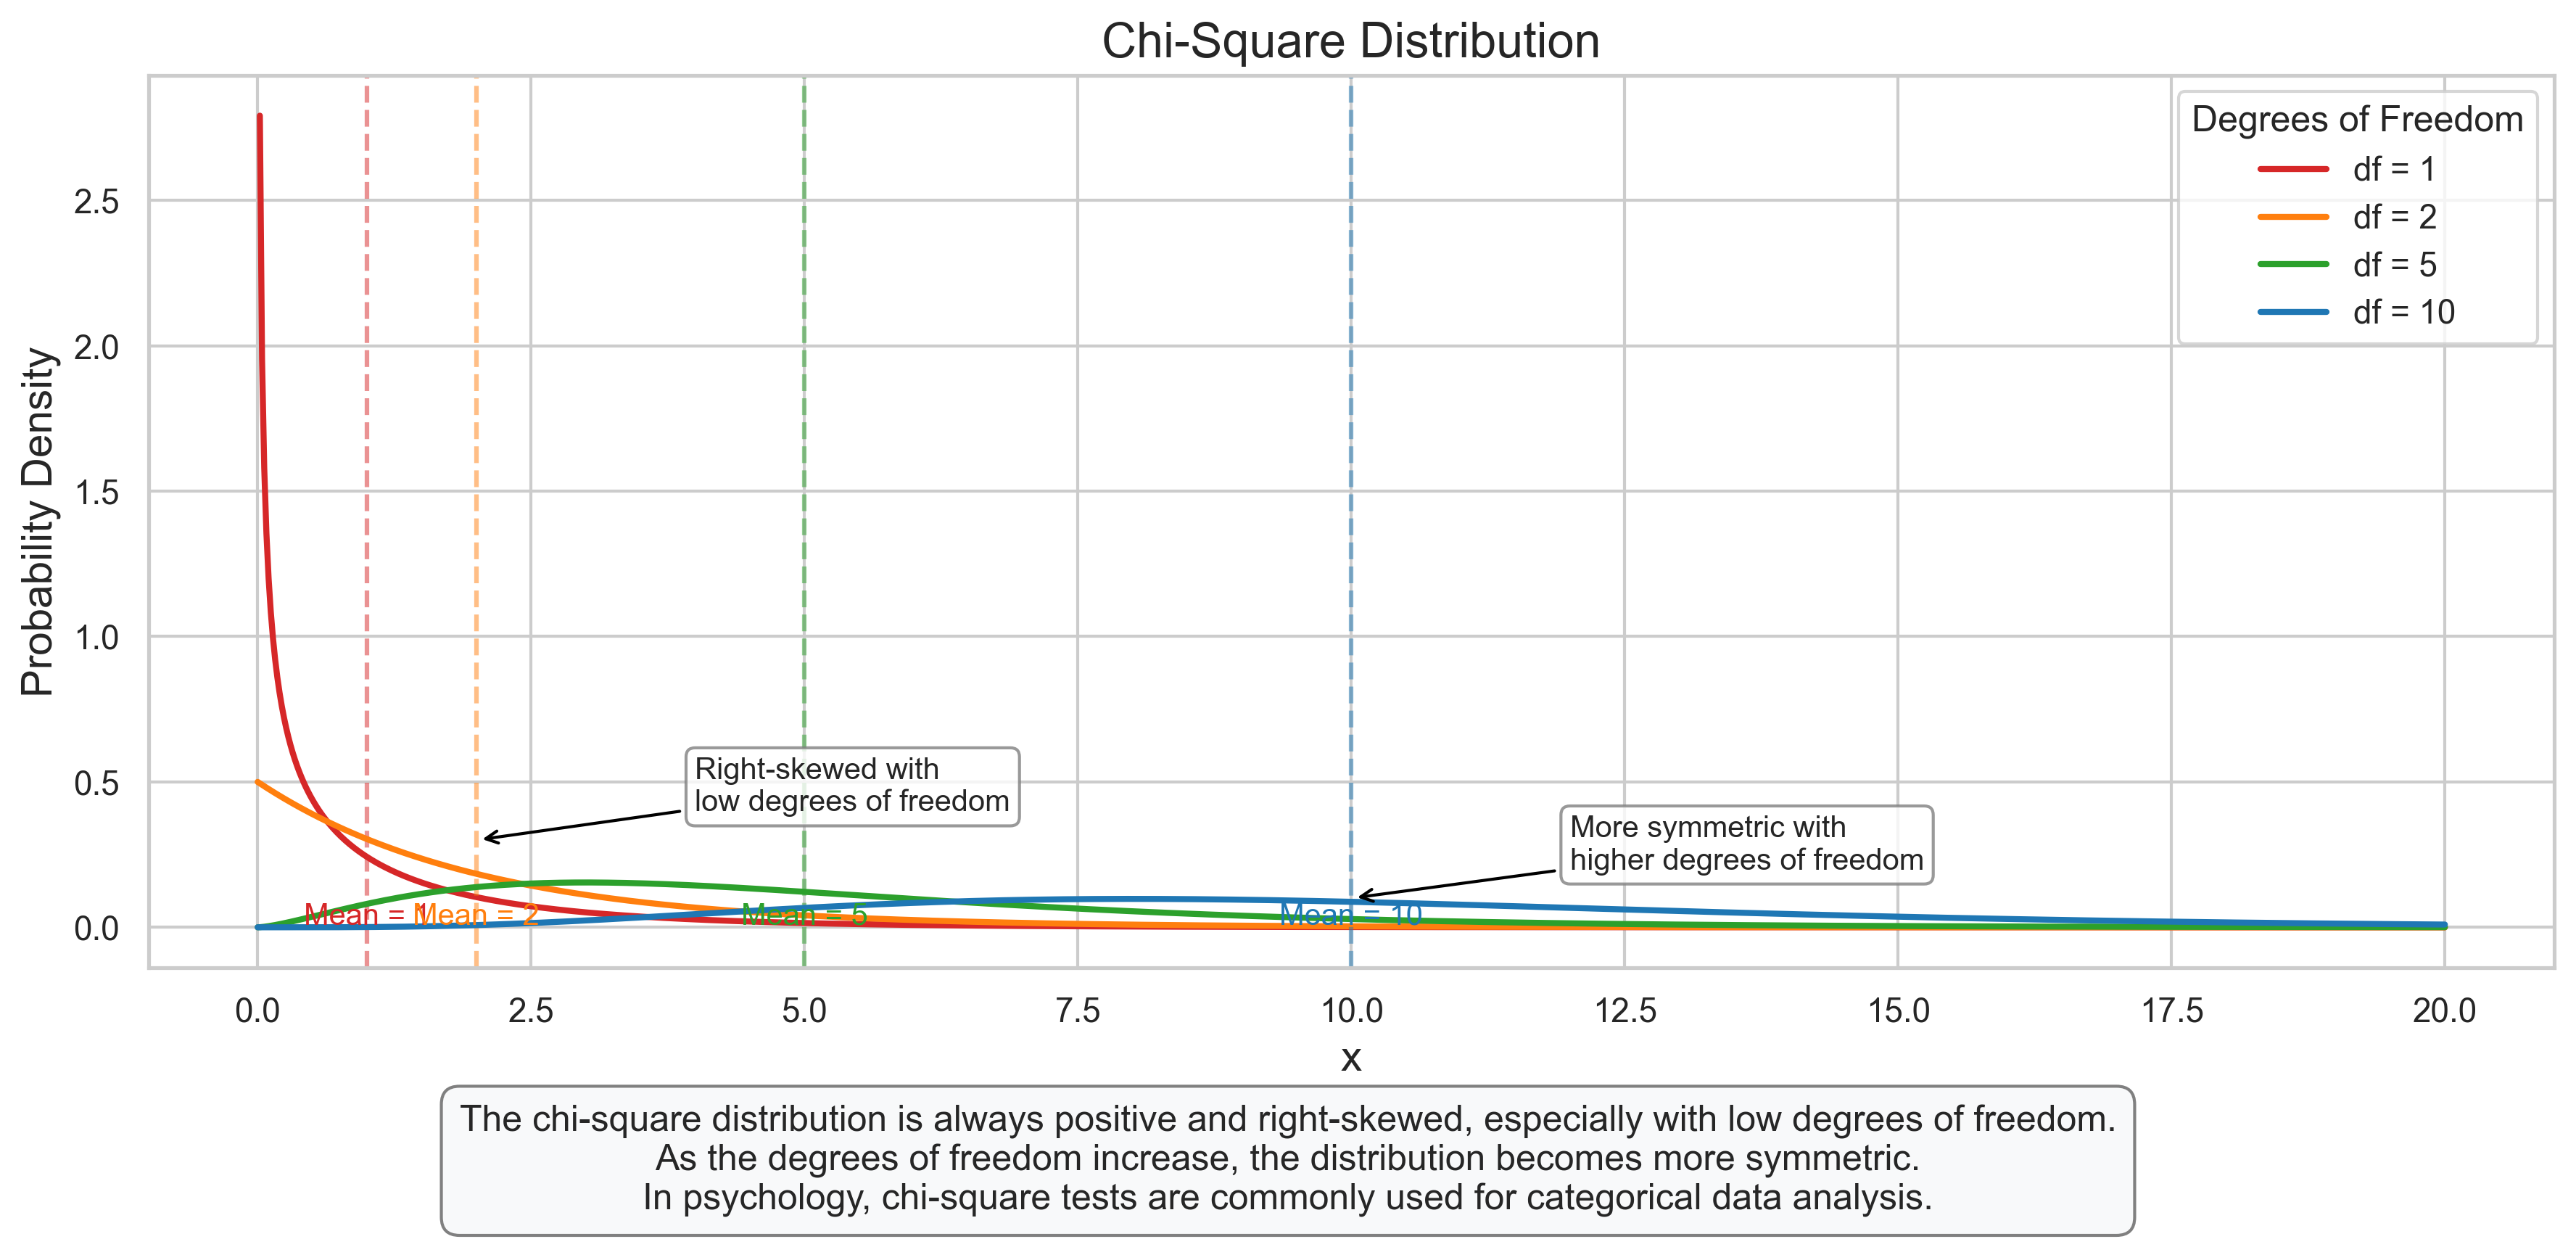

In [9]:
# Chi-Square Distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Define x range
x = np.linspace(0, 20, 1000)

# Plot chi-square distributions with different degrees of freedom
df_values = [1, 2, 5, 10]
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']

for i, df in enumerate(df_values):
    chi2_pdf = stats.chi2.pdf(x, df)
    ax.plot(x, chi2_pdf, color=colors[i], label=f'df = {df}', linewidth=2)
    
    # Add vertical line at mean (df)
    ax.axvline(df, color=colors[i], linestyle='--', alpha=0.5)
    ax.text(df, 0.01, f'Mean = {df}', color=colors[i], ha='center', fontsize=10)

# Add labels and title
ax.set_title('Chi-Square Distribution', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.legend(title='Degrees of Freedom')

# Add annotations
ax.annotate('Right-skewed with\nlow degrees of freedom', xy=(2, 0.3), xytext=(4, 0.4),
           arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

ax.annotate('More symmetric with\nhigher degrees of freedom', xy=(10, 0.1), xytext=(12, 0.2),
           arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "The chi-square distribution is always positive and right-skewed, especially with low degrees of freedom.\n"
                      "As the degrees of freedom increase, the distribution becomes more symmetric.\n"
                      "In psychology, chi-square tests are commonly used for categorical data analysis.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 3.5 F-Distribution

The F-distribution describes the ratio of two chi-square distributions divided by their respective degrees of freedom. It is used in the analysis of variance (ANOVA) and other statistical tests.

**Key Properties:**
- Shape determined by two parameters: df1 (numerator) and df2 (denominator)
- Always positive
- Right-skewed
- Approaches 1 as both df1 and df2 increase

**Psychological Applications:**
- Analysis of Variance (ANOVA)
- Testing equality of variances
- Multiple regression analysis
- Comparing model fits

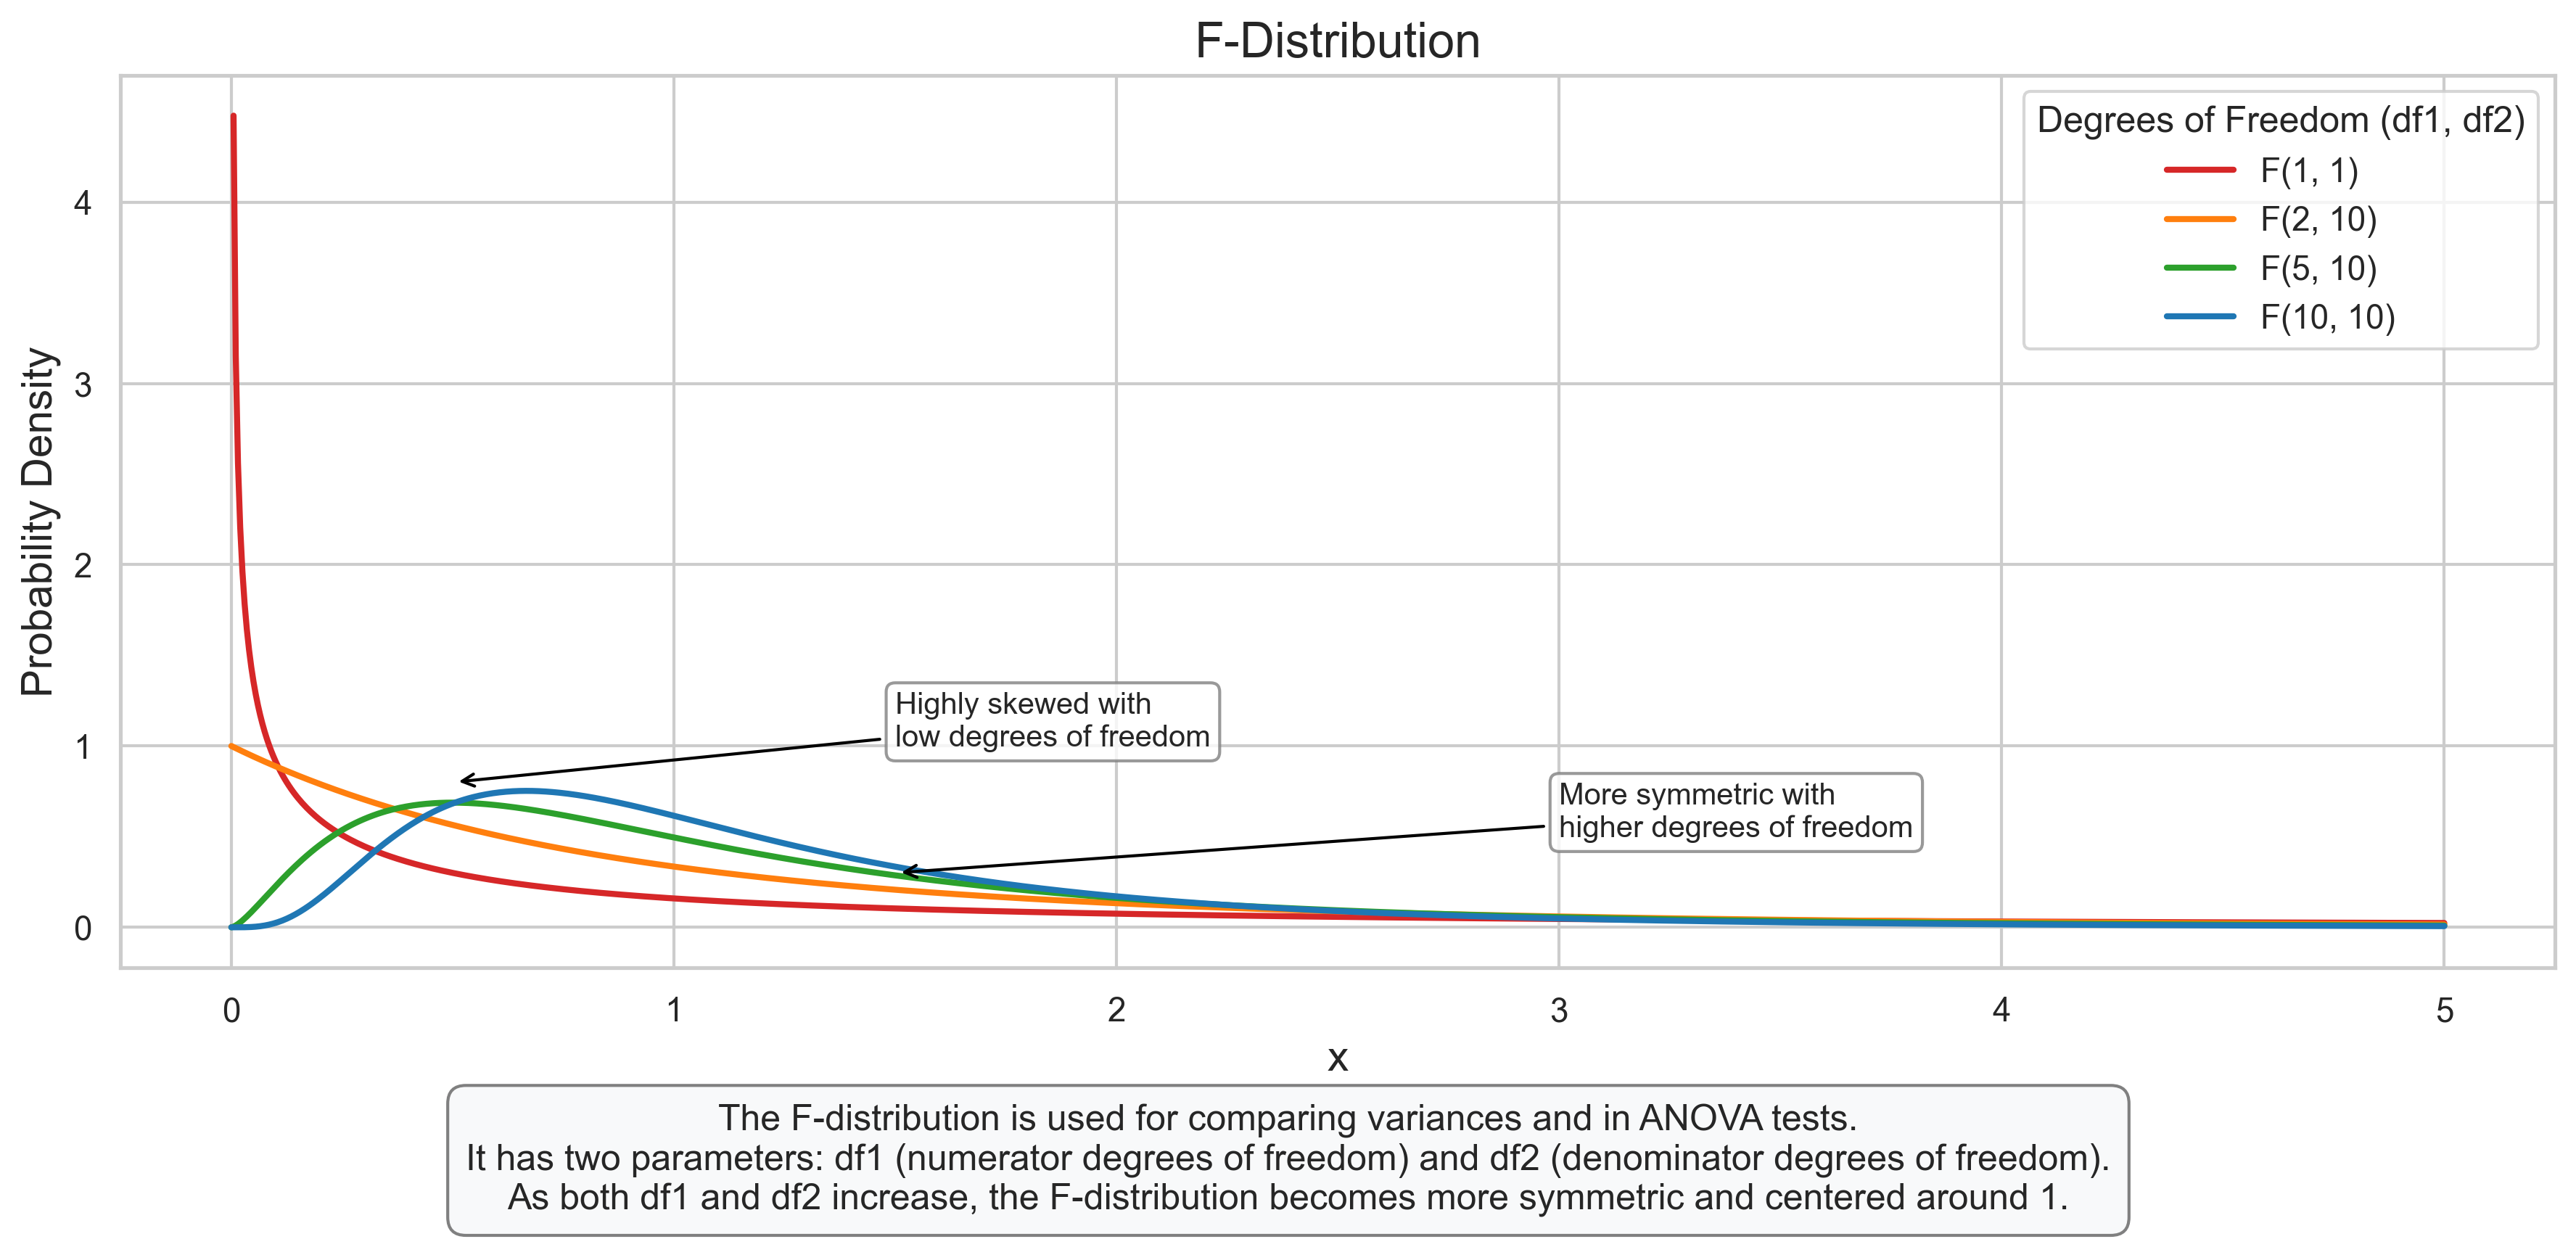

In [10]:
# F-Distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Define x range
x = np.linspace(0, 5, 1000)

# Plot F-distributions with different degrees of freedom
df_pairs = [(1, 1), (2, 10), (5, 10), (10, 10)]
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']

for i, (df1, df2) in enumerate(df_pairs):
    f_pdf = stats.f.pdf(x, df1, df2)
    ax.plot(x, f_pdf, color=colors[i], label=f'F({df1}, {df2})', linewidth=2)

# Add labels and title
ax.set_title('F-Distribution', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.legend(title='Degrees of Freedom (df1, df2)')

# Add annotations
ax.annotate('Highly skewed with\nlow degrees of freedom', xy=(0.5, 0.8), xytext=(1.5, 1.0),
           arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

ax.annotate('More symmetric with\nhigher degrees of freedom', xy=(1.5, 0.3), xytext=(3, 0.5),
           arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "The F-distribution is used for comparing variances and in ANOVA tests.\n"
                      "It has two parameters: df1 (numerator degrees of freedom) and df2 (denominator degrees of freedom).\n"
                      "As both df1 and df2 increase, the F-distribution becomes more symmetric and centered around 1.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 3.6 Psychological Example: Reaction Time Analysis

Let's apply continuous distributions to model reaction times in a psychological experiment.

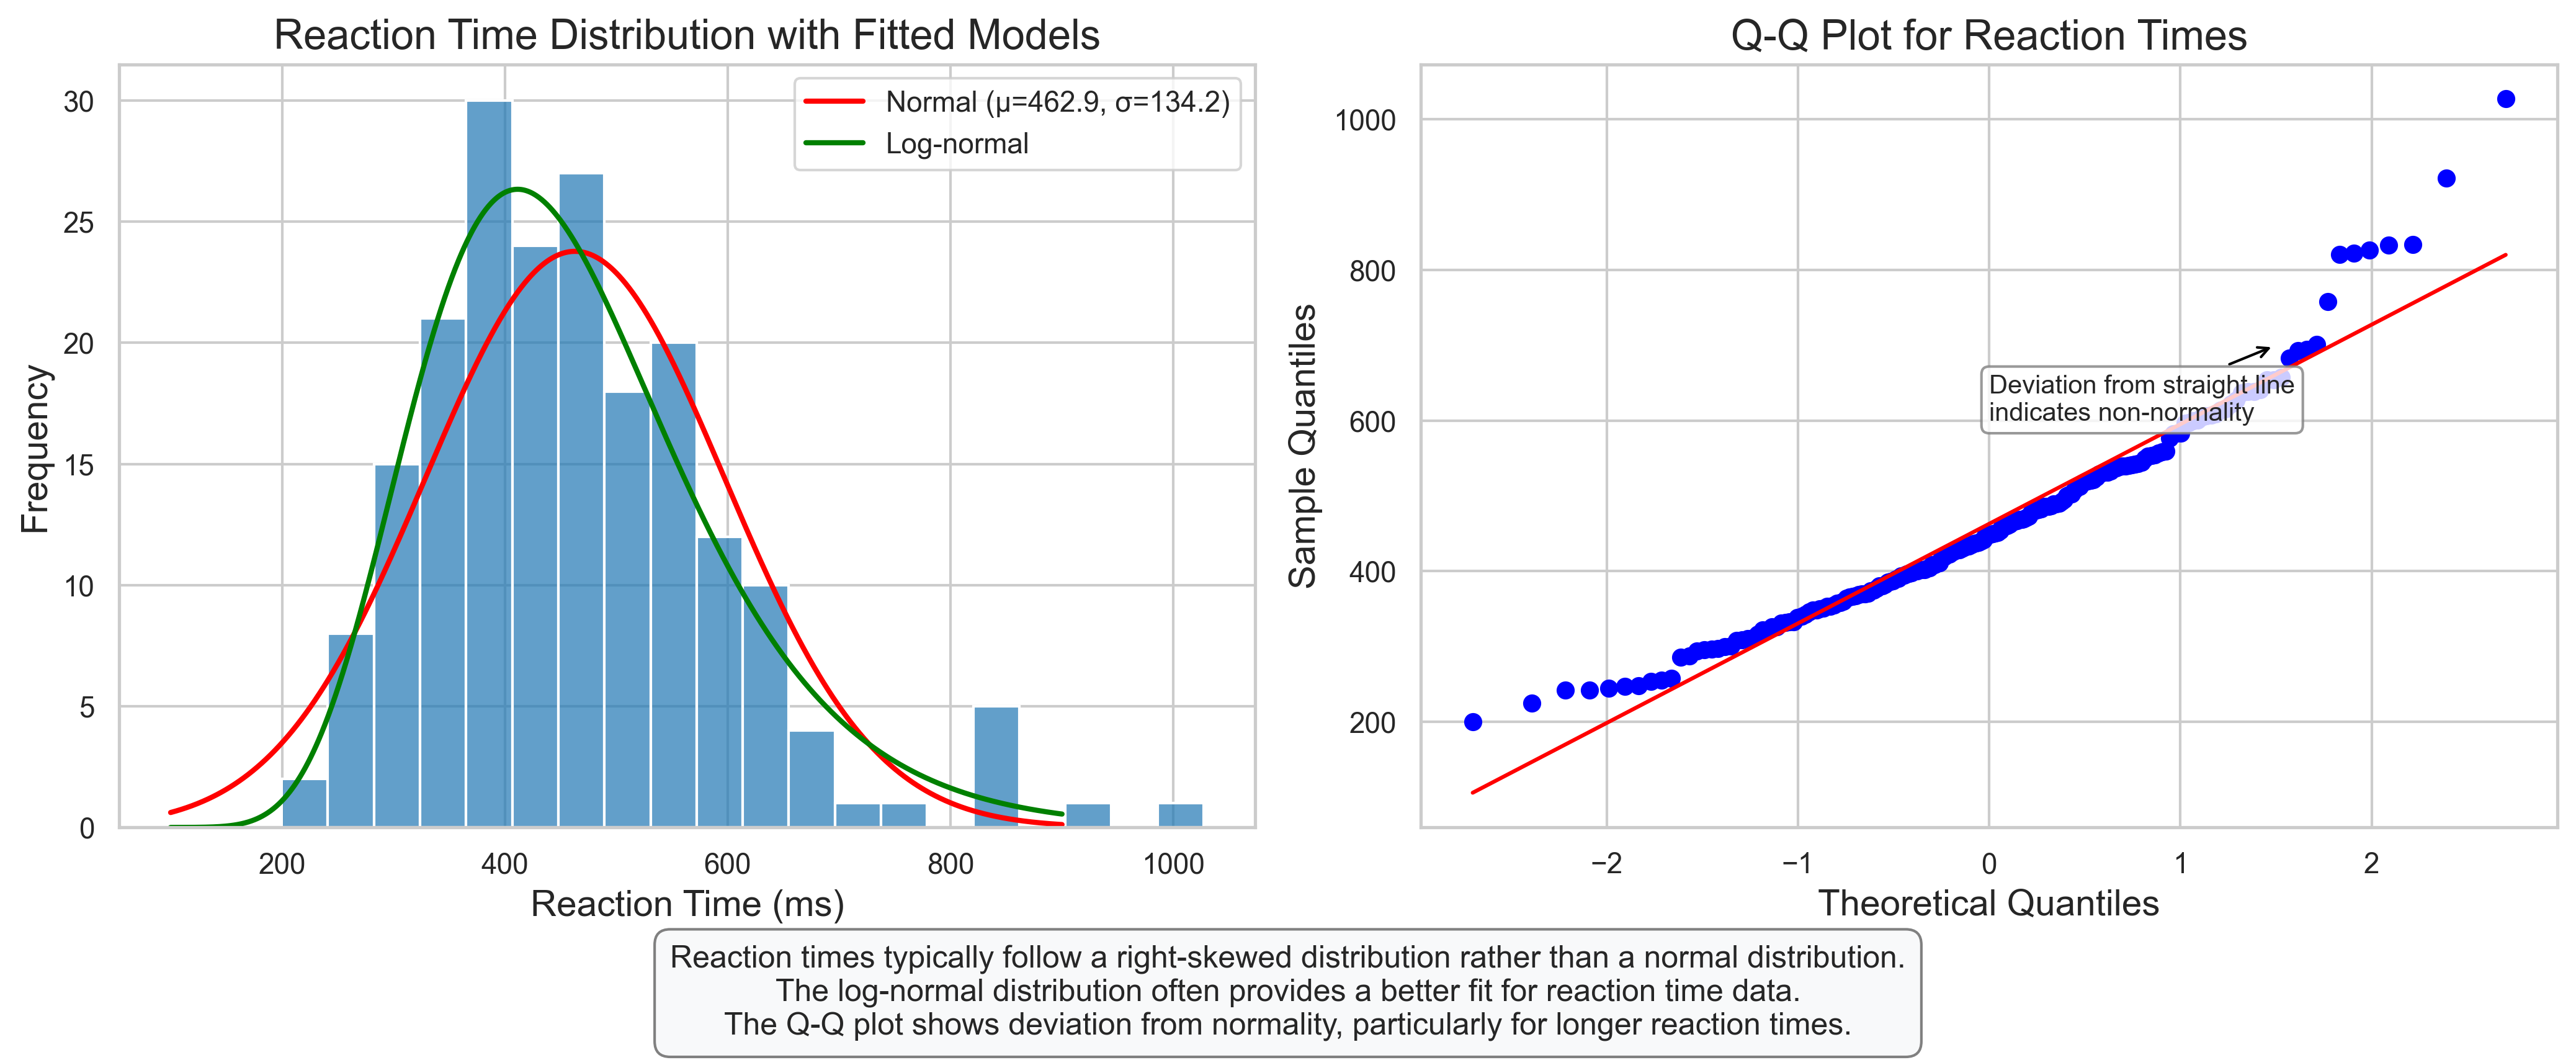

In [11]:
# Psychological Example: Reaction Time Analysis
# Simulate reaction time data (typically right-skewed)

# Parameters
n_participants = 200
mean_rt = 350  # mean reaction time in milliseconds
sd_rt = 80     # standard deviation in milliseconds

# Simulate data using ex-Gaussian distribution (common for reaction times)
# Ex-Gaussian is a convolution of a normal and exponential distribution
normal_component = np.random.normal(mean_rt, sd_rt, n_participants)
exponential_component = np.random.exponential(100, n_participants)  # exponential parameter
reaction_times = normal_component + exponential_component

# Create a DataFrame
df_rt = pd.DataFrame({
    'Participant': range(1, n_participants + 1),
    'ReactionTime': reaction_times
})

# Plot the distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Histogram with fitted distributions
sns.histplot(df_rt['ReactionTime'], bins=20, kde=False, ax=axes[0], color='#1f77b4', alpha=0.7)

# Fit normal distribution
mu, sigma = stats.norm.fit(reaction_times)
x = np.linspace(100, 900, 1000)
pdf_norm = stats.norm.pdf(x, mu, sigma)
axes[0].plot(x, pdf_norm * len(reaction_times) * (900-100)/20, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={sigma:.1f})')

# Fit log-normal distribution (often better for reaction times)
shape, loc, scale = stats.lognorm.fit(reaction_times)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
axes[0].plot(x, pdf_lognorm * len(reaction_times) * (900-100)/20, 'g-', linewidth=2, label=f'Log-normal')

axes[0].set_title('Reaction Time Distribution with Fitted Models', fontsize=16)
axes[0].set_xlabel('Reaction Time (ms)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].legend()

# Plot 2: Q-Q plot to assess normality
stats.probplot(reaction_times, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for Reaction Times', fontsize=16)
axes[1].set_xlabel('Theoretical Quantiles', fontsize=14)
axes[1].set_ylabel('Sample Quantiles', fontsize=14)

# Add annotation to Q-Q plot
axes[1].annotate('Deviation from straight line\nindicates non-normality', xy=(1.5, 700), xytext=(0, 600),
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "Reaction times typically follow a right-skewed distribution rather than a normal distribution.\n"
                      "The log-normal distribution often provides a better fit for reaction time data.\n"
                      "The Q-Q plot shows deviation from normality, particularly for longer reaction times.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## 4. Sampling Distributions

Sampling distributions describe the distribution of a statistic (like the sample mean) calculated from repeated samples of the same size from a population. They are crucial for statistical inference.

### 4.1 Sampling Distribution of the Mean

The sampling distribution of the mean describes how the sample mean varies across different samples of the same size from the same population.

**Key Properties:**
- Mean of the sampling distribution equals the population mean
- Standard error (SE) of the mean = $\frac{\sigma}{\sqrt{n}}$ (where $\sigma$ is the population standard deviation and $n$ is the sample size)
- As sample size increases, the sampling distribution becomes more normal (Central Limit Theorem)
- For large samples, the sampling distribution is approximately normal regardless of the population distribution

**Psychological Applications:**
- Estimating population parameters from sample statistics
- Constructing confidence intervals for means
- Determining required sample sizes for desired precision
- Hypothesis testing about population means

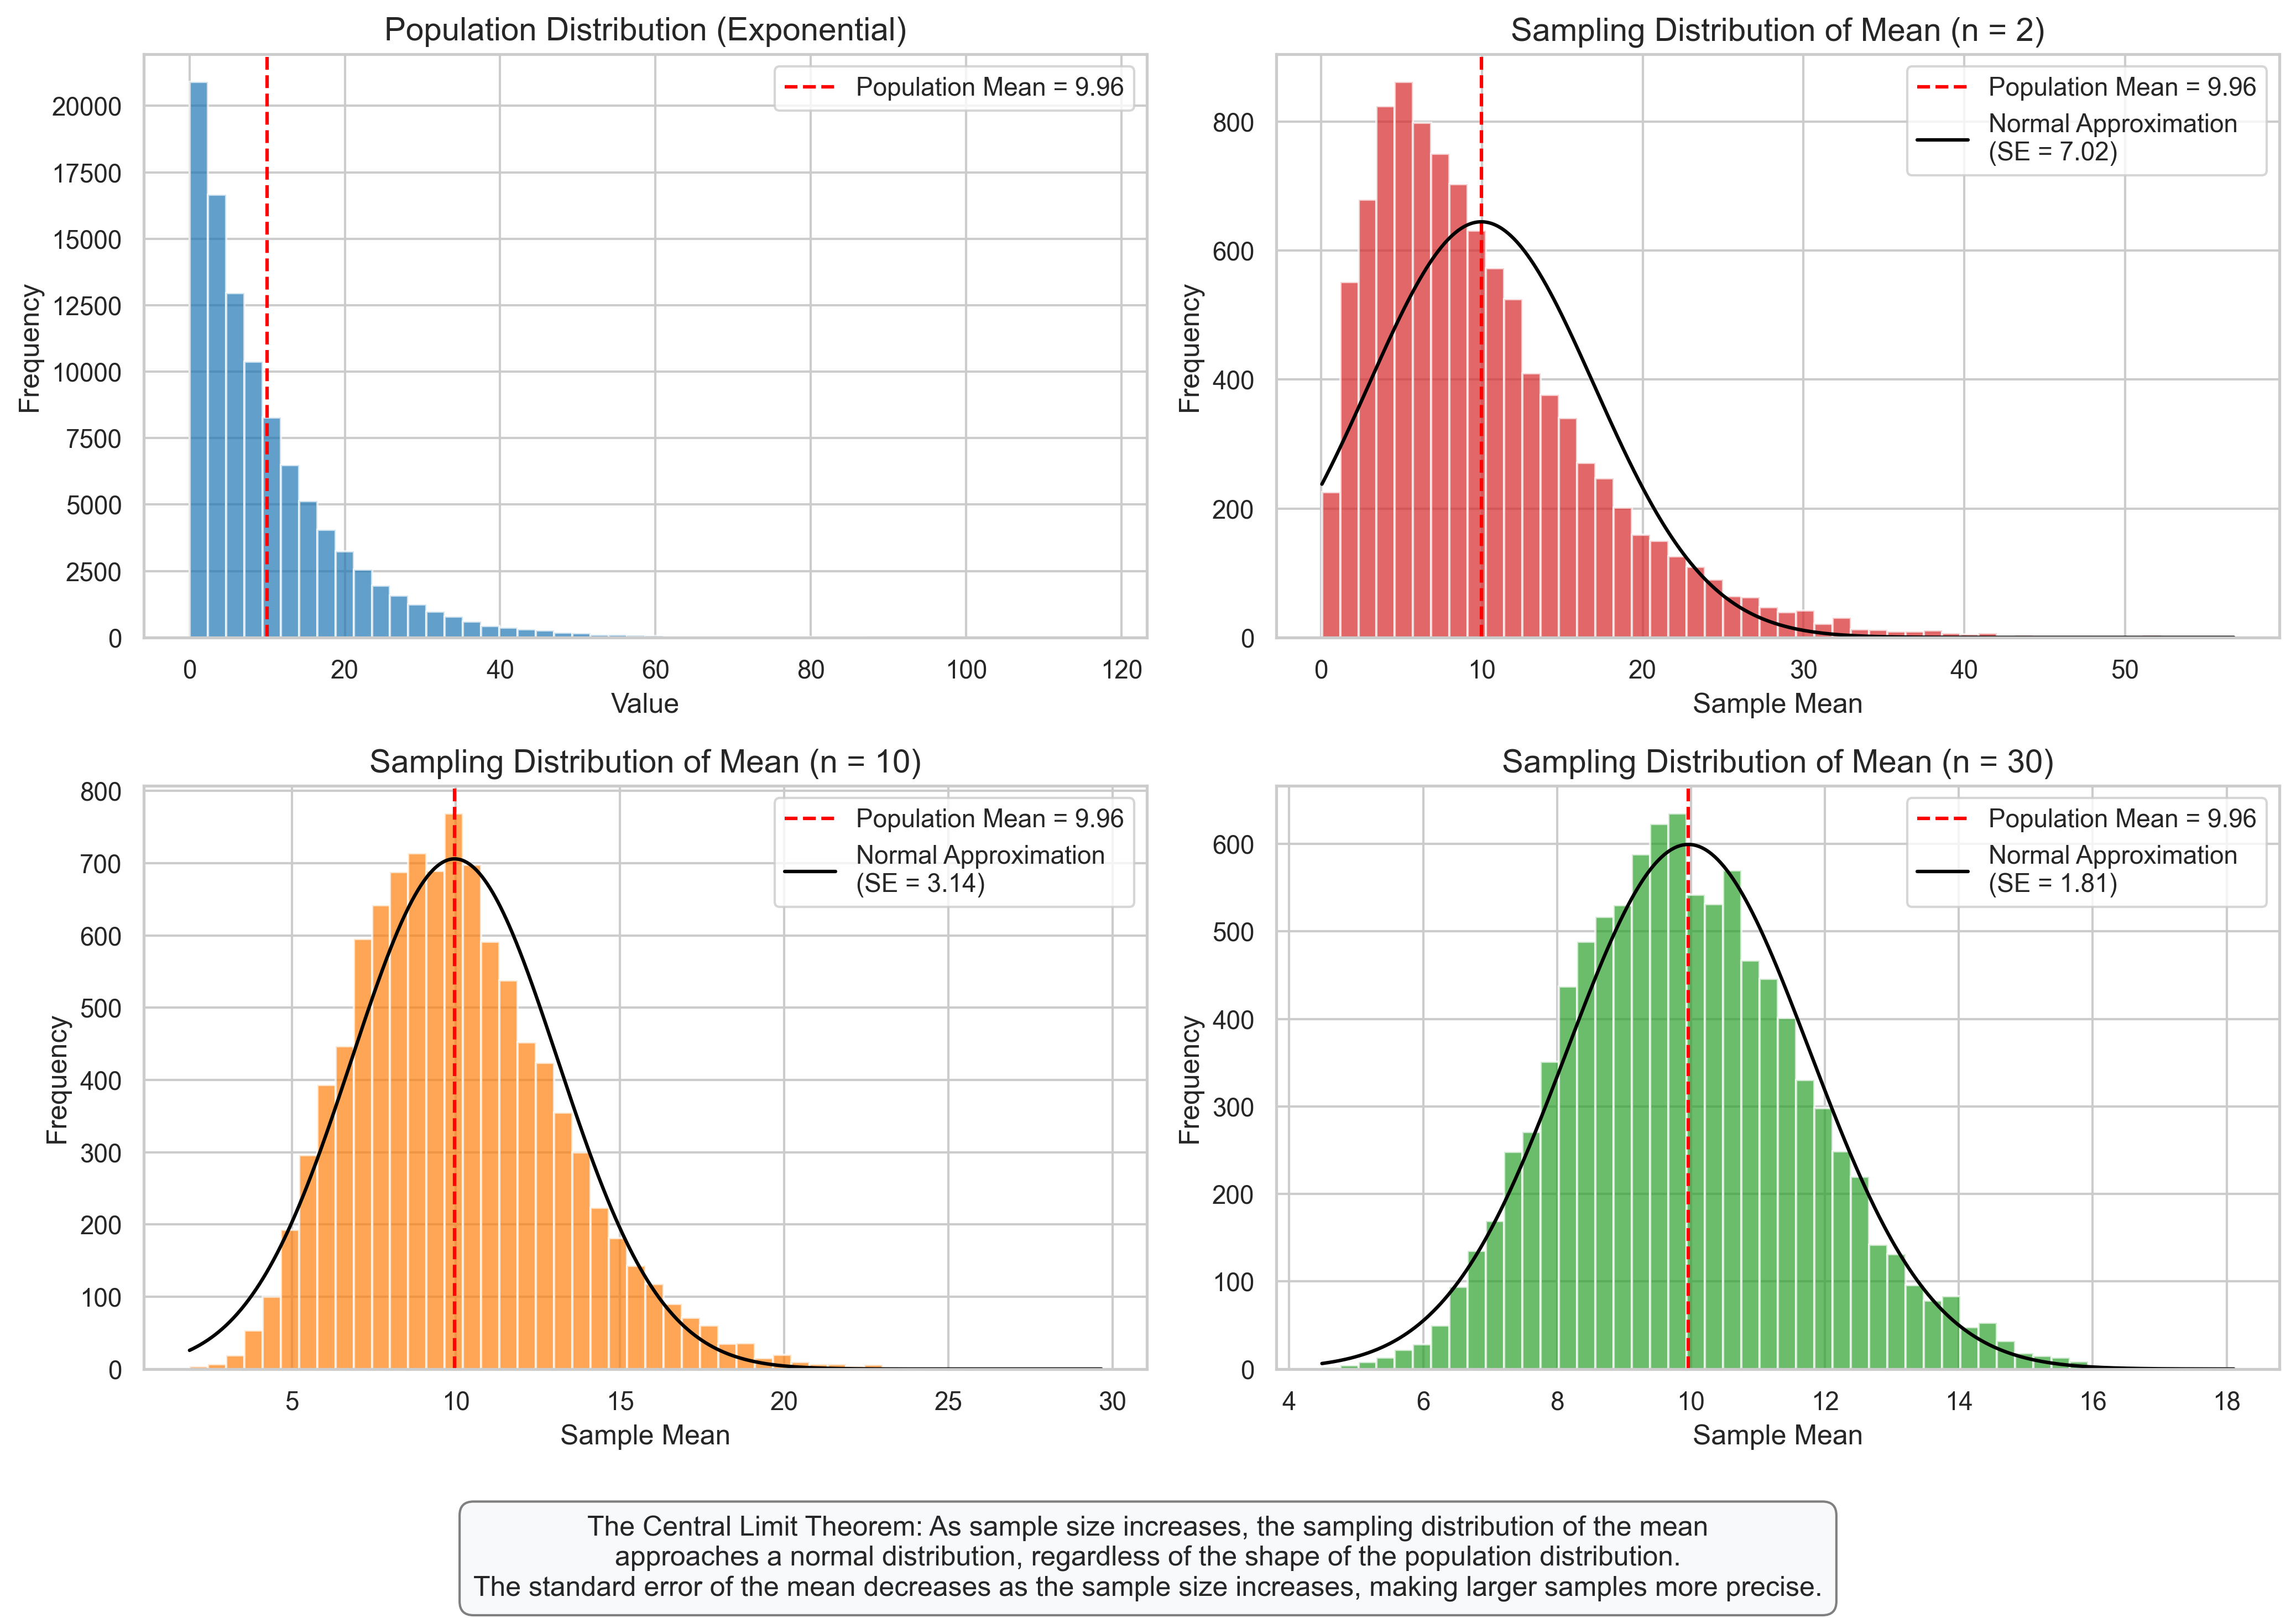

In [12]:
# Sampling Distribution of the Mean
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Create a non-normal population (exponential distribution)
np.random.seed(42)
population = np.random.exponential(scale=10, size=100000)
pop_mean = np.mean(population)
pop_std = np.std(population)

# Plot the population distribution
axes[0].hist(population, bins=50, alpha=0.7, color='#1f77b4')
axes[0].axvline(pop_mean, color='r', linestyle='--', label=f'Population Mean = {pop_mean:.2f}')
axes[0].set_title('Population Distribution (Exponential)', fontsize=14)
axes[0].set_xlabel('Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()

# Simulate sampling distributions for different sample sizes
sample_sizes = [2, 10, 30]
n_samples = 10000
colors = ['#d62728', '#ff7f0e', '#2ca02c']

for i, n in enumerate(sample_sizes):
    # Draw many samples of size n and calculate their means
    sample_means = [np.mean(np.random.choice(population, size=n)) for _ in range(n_samples)]
    
    # Calculate the standard error
    se = pop_std / np.sqrt(n)
    
    # Plot the sampling distribution
    axes[i+1].hist(sample_means, bins=50, alpha=0.7, color=colors[i])
    axes[i+1].axvline(pop_mean, color='r', linestyle='--', label=f'Population Mean = {pop_mean:.2f}')
    
    # Plot the normal approximation
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    pdf = stats.norm.pdf(x, pop_mean, se)
    axes[i+1].plot(x, pdf * len(sample_means) * (max(sample_means)-min(sample_means))/50, 'k-', 
                  label=f'Normal Approximation\n(SE = {se:.2f})')
    
    axes[i+1].set_title(f'Sampling Distribution of Mean (n = {n})', fontsize=14)
    axes[i+1].set_xlabel('Sample Mean', fontsize=12)
    axes[i+1].set_ylabel('Frequency', fontsize=12)
    axes[i+1].legend()

# Add explanatory text
plt.figtext(0.5, 0.01, "The Central Limit Theorem: As sample size increases, the sampling distribution of the mean\n"
                      "approaches a normal distribution, regardless of the shape of the population distribution.\n"
                      "The standard error of the mean decreases as the sample size increases, making larger samples more precise.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.98])
plt.show()

### 4.2 Central Limit Theorem

The Central Limit Theorem (CLT) is one of the most important concepts in statistics. It states that the sampling distribution of the mean approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.

**Key Points:**
- For sufficiently large samples, the sampling distribution of the mean is approximately normal
- The approximation improves as sample size increases
- The mean of the sampling distribution equals the population mean
- The standard deviation of the sampling distribution (standard error) equals $\frac{\sigma}{\sqrt{n}}$
- Generally, samples of size 30 or more are considered "large enough" for the CLT to apply

**Psychological Applications:**
- Justifies the use of parametric tests even when data isn't perfectly normal
- Allows for statistical inference about population parameters
- Provides the foundation for many statistical procedures used in psychological research

Text(0.5, 0.98, 'Central Limit Theorem: Sampling Distributions for Different Populations')

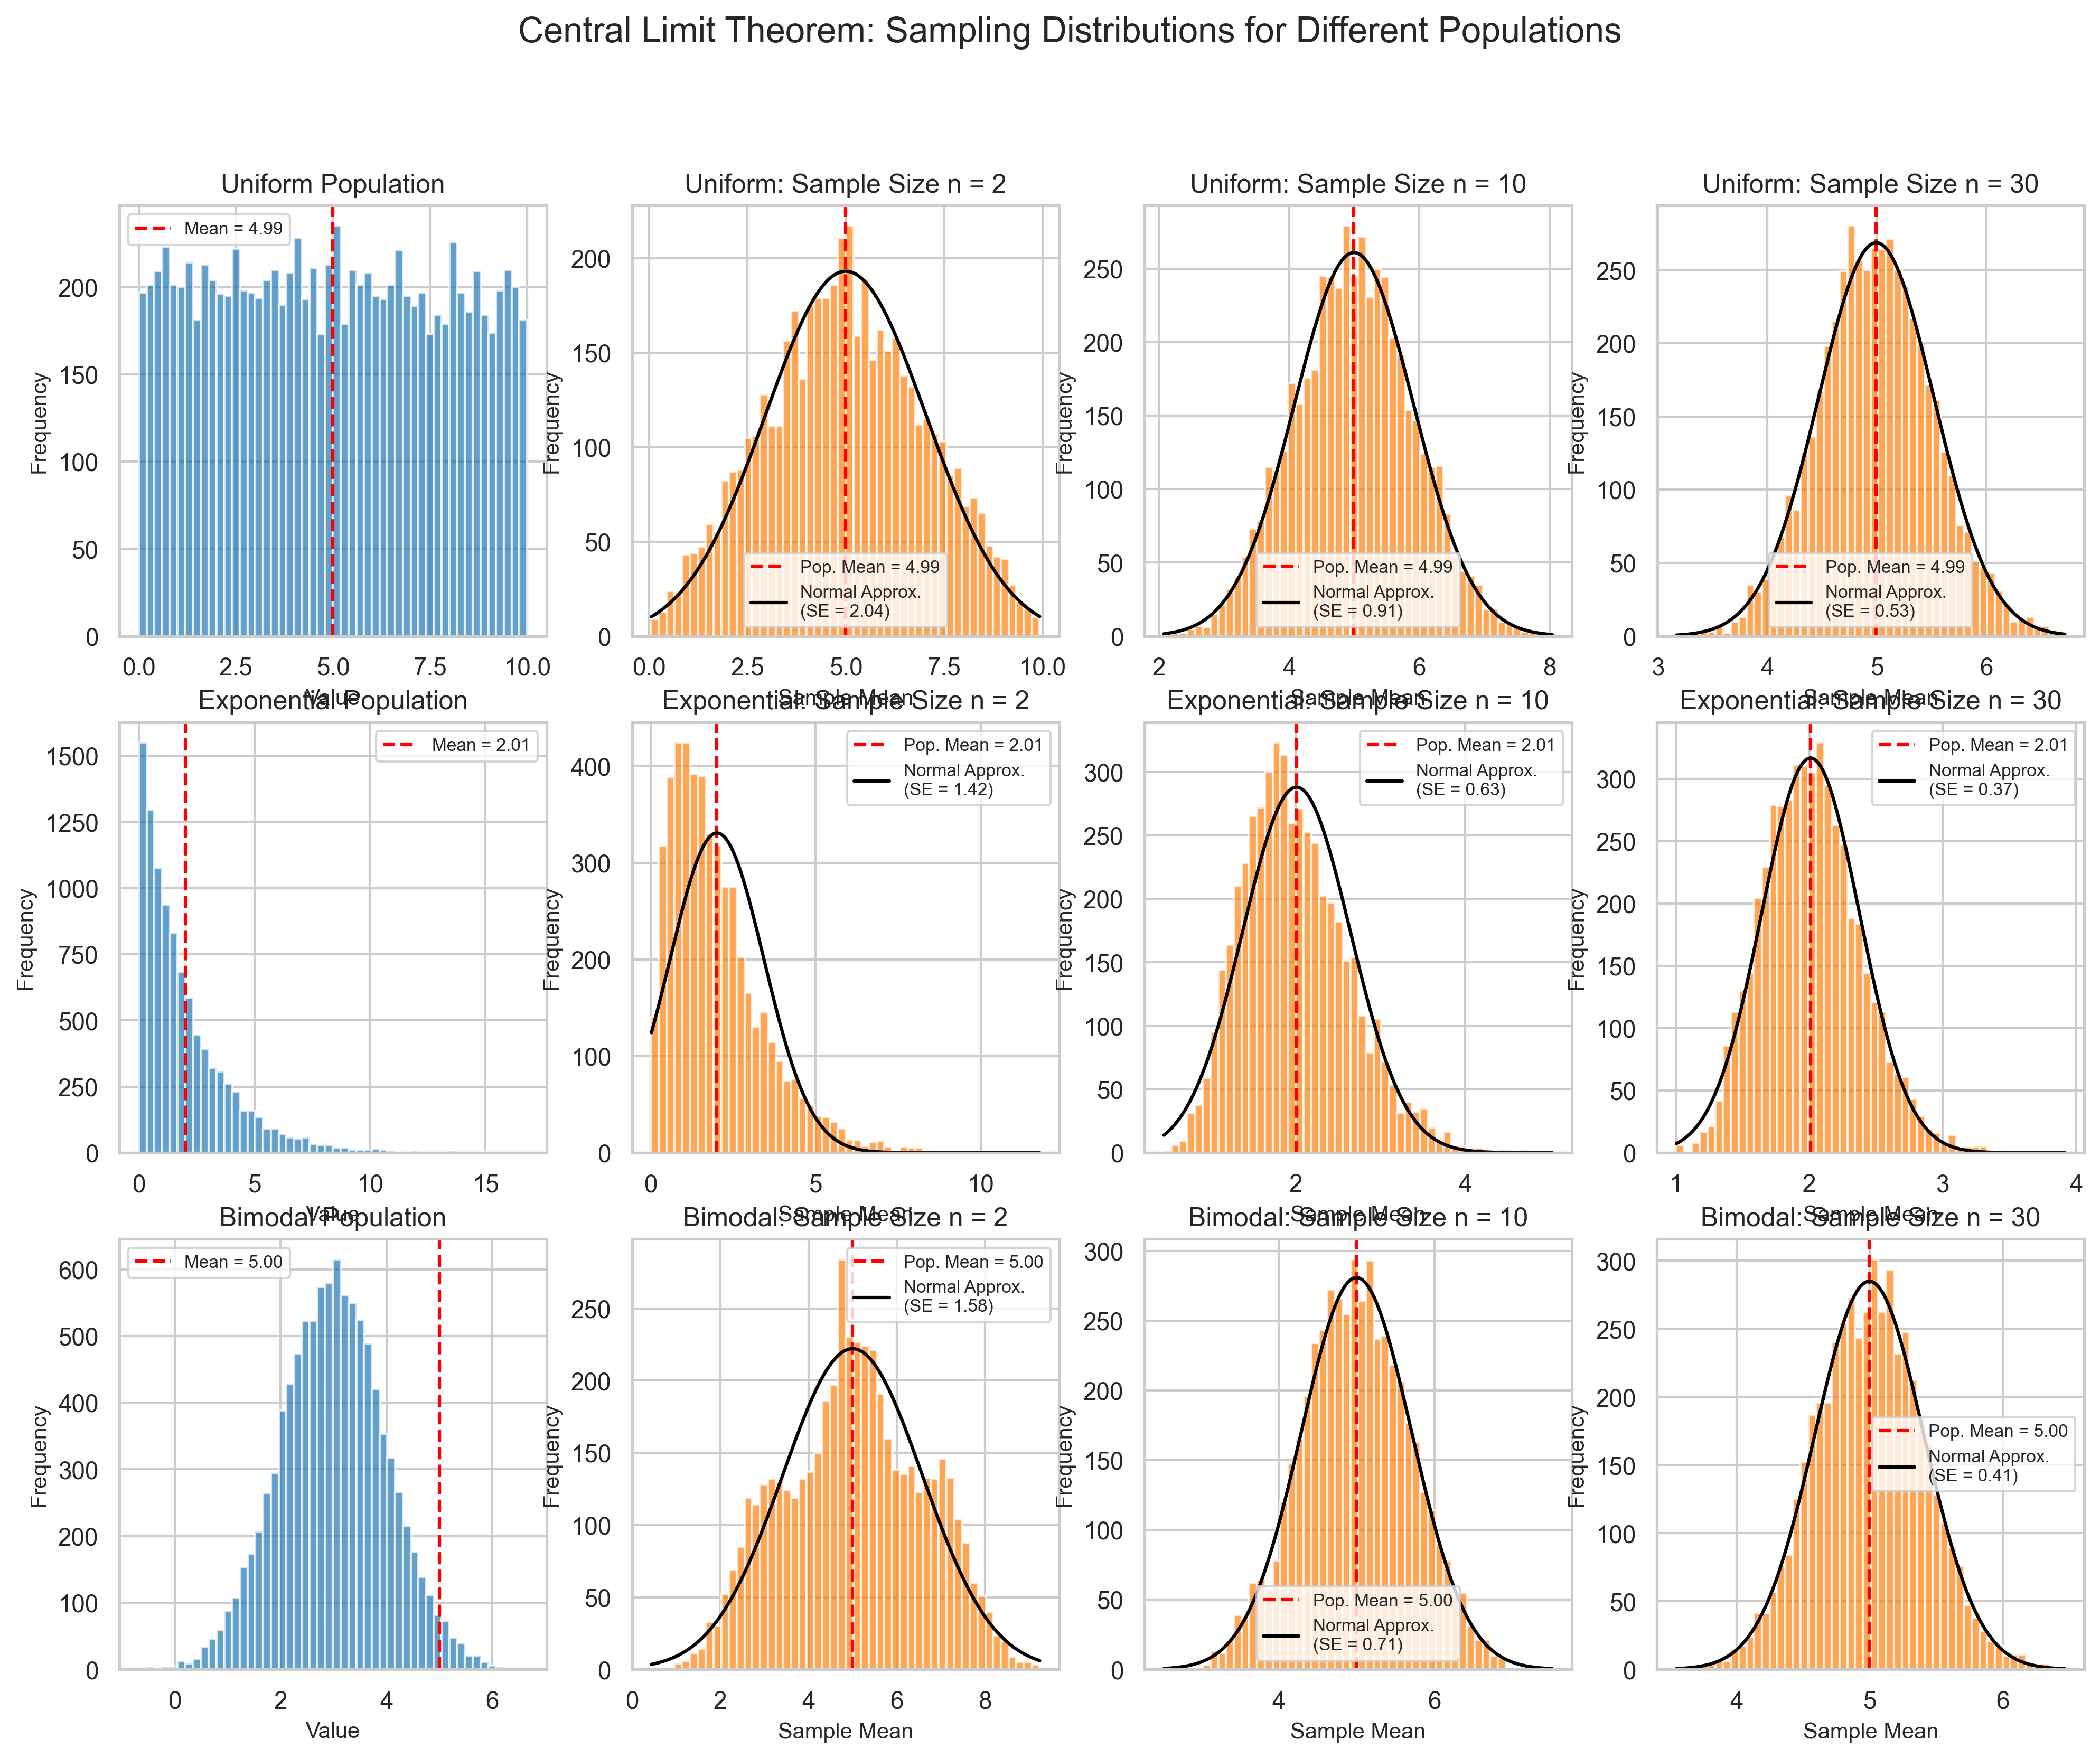

In [13]:
# Central Limit Theorem Demonstration
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
# Create three different population distributions
np.random.seed(42)
n_population = 100000
# 1. Uniform Distribution
pop_uniform = np.random.uniform(0, 10, n_population)
pop_name1 = "Uniform"
pop_mean1 = np.mean(pop_uniform)
pop_std1 = np.std(pop_uniform)
# 2. Exponential Distribution
pop_exponential = np.random.exponential(scale=2, size=n_population)
pop_name2 = "Exponential"
pop_mean2 = np.mean(pop_exponential)
pop_std2 = np.std(pop_exponential)
# 3. Bimodal Distribution (mixture of two normals)
pop_bimodal = np.concatenate([
    np.random.normal(3, 1, n_population // 2),
    np.random.normal(7, 1, n_population // 2)
])
pop_name3 = "Bimodal"
pop_mean3 = np.mean(pop_bimodal)
pop_std3 = np.std(pop_bimodal)
populations = [(pop_uniform, pop_name1, pop_mean1, pop_std1),
               (pop_exponential, pop_name2, pop_mean2, pop_std2),
               (pop_bimodal, pop_name3, pop_mean3, pop_std3)]
# Sample sizes to demonstrate CLT
sample_sizes = [2, 10, 30]
n_samples = 5000  # Reduced from 10000 to improve performance
# Plot for each population and sample size
for i, (population, pop_name, pop_mean, pop_std) in enumerate(populations):
    # Plot population distribution
    axes[i, 0].hist(population[:10000], bins=50, alpha=0.7, color='#1f77b4')  # Sample the population for faster plotting
    axes[i, 0].axvline(pop_mean, color='r', linestyle='--', label=f'Mean = {pop_mean:.2f}')
    axes[i, 0].set_title(f'{pop_name} Population', fontsize=12)
    axes[i, 0].set_xlabel('Value', fontsize=10)
    axes[i, 0].set_ylabel('Frequency', fontsize=10)
    axes[i, 0].legend(fontsize=8)
    
    # Plot sampling distributions for different sample sizes
    for j, n in enumerate(sample_sizes):
        # Draw many samples of size n and calculate their means
        # Use numpy's random.choice more efficiently
        indices = np.random.randint(0, len(population), size=(n_samples, n))
        sample_values = population[indices]
        sample_means = np.mean(sample_values, axis=1)
        
        # Calculate the standard error
        se = pop_std / np.sqrt(n)
        
        # Plot the sampling distribution
        # Fix the indexing issue by using j instead of j+1
        axes[i, j+1].hist(sample_means, bins=50, alpha=0.7, color='#ff7f0e')
        axes[i, j+1].axvline(pop_mean, color='r', linestyle='--', label=f'Pop. Mean = {pop_mean:.2f}')
        
        # Plot the normal approximation - with error handling
        try:
            x = np.linspace(np.min(sample_means), np.max(sample_means), 1000)
            pdf = stats.norm.pdf(x, pop_mean, se)
            scaling_factor = len(sample_means) * (np.max(sample_means) - np.min(sample_means)) / 50
            axes[i, j+1].plot(x, pdf * scaling_factor, 'k-', 
                            label=f'Normal Approx.\n(SE = {se:.2f})')
        except Exception as e:
            print(f"Error plotting normal approximation for {pop_name}, n={n}: {e}")
        
        axes[i, j+1].set_title(f'{pop_name}: Sample Size n = {n}', fontsize=12)
        axes[i, j+1].set_xlabel('Sample Mean', fontsize=10)
        axes[i, j+1].set_ylabel('Frequency', fontsize=10)
        axes[i, j+1].legend(fontsize=8)
# Add overall title
fig.suptitle('Central Limit Theorem: Sampling Distributions for Different Populations', fontsize=16)
#

### 4.3 Confidence Intervals

Confidence intervals provide a range of plausible values for a population parameter based on a sample statistic. They are constructed using the sampling distribution of the statistic.

**Key Concepts:**
- A 95% confidence interval means that if we were to take many samples and compute the interval for each, about 95% of these intervals would contain the true population parameter
- Wider intervals indicate less precision (more uncertainty)
- Confidence interval for a mean: $\bar{X} \pm t_{\alpha/2} \times \frac{s}{\sqrt{n}}$ (where $t_{\alpha/2}$ is the critical t-value)
- As sample size increases, confidence intervals become narrower

**Psychological Applications:**
- Estimating population parameters with a measure of precision
- Communicating uncertainty in research findings
- Making inferences about treatment effects
- Comparing groups or conditions

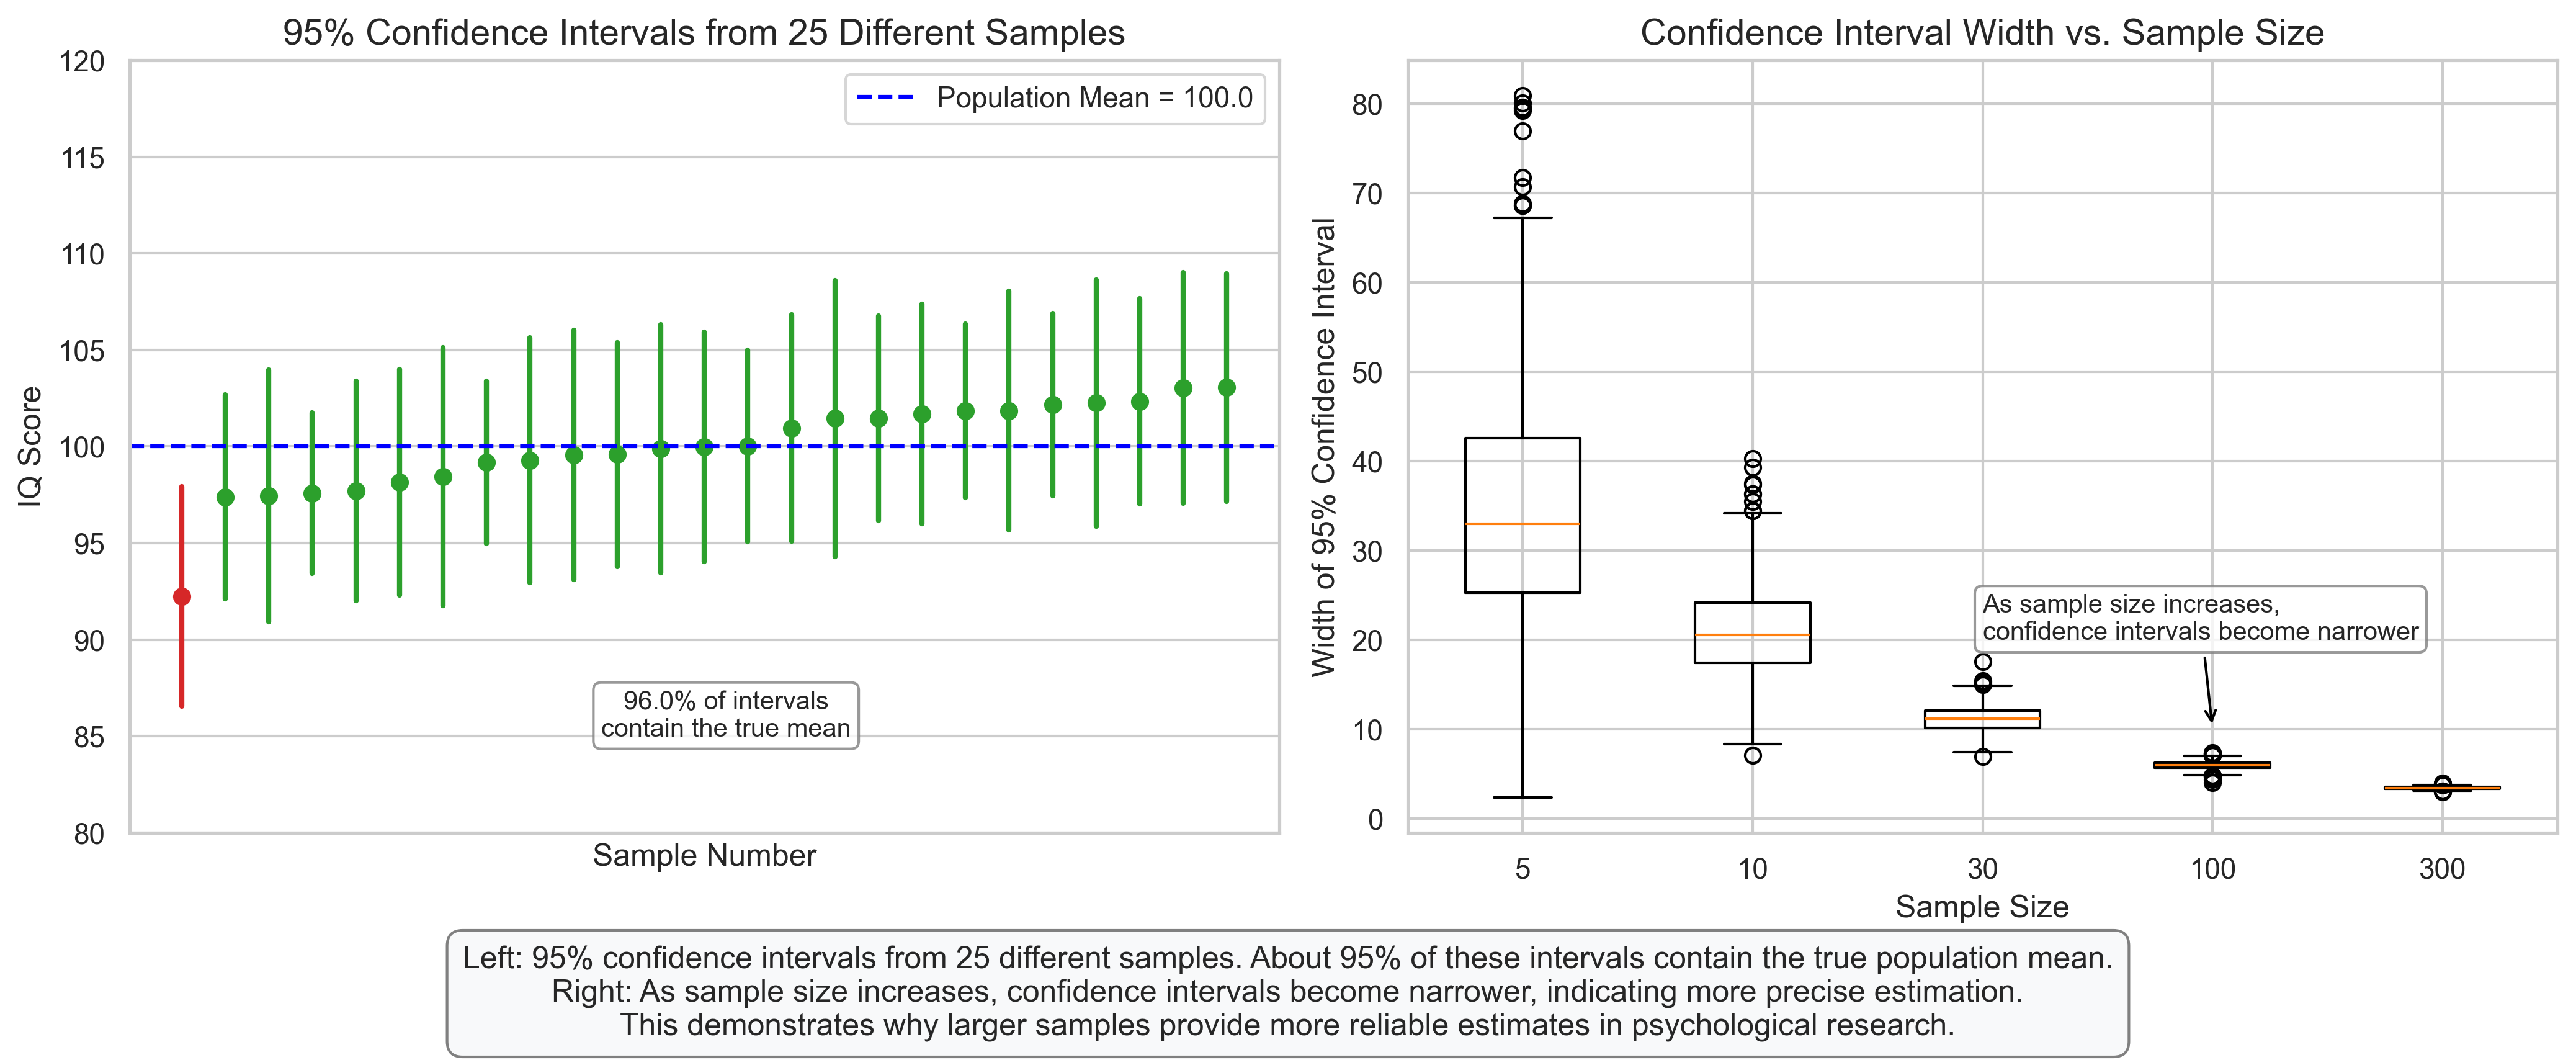

In [14]:
# Confidence Intervals Demonstration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create a population
np.random.seed(42)
population = np.random.normal(100, 15, 100000)  # IQ scores: mean=100, sd=15
pop_mean = np.mean(population)

# Function to calculate confidence interval
def calculate_ci(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    sem = stats.sem(sample)  # Standard error of the mean
    ci = stats.t.interval(confidence, n-1, mean, sem)  # t-distribution for small samples
    return mean, ci[0], ci[1]

# Plot 1: Multiple confidence intervals from different samples
n_samples = 25
sample_size = 30
sample_means = []
cis_lower = []
cis_upper = []
contains_mean = []

for i in range(n_samples):
    sample = np.random.choice(population, size=sample_size)
    mean, ci_lower, ci_upper = calculate_ci(sample)
    sample_means.append(mean)
    cis_lower.append(ci_lower)
    cis_upper.append(ci_upper)
    contains_mean.append(ci_lower <= pop_mean <= ci_upper)

# Sort by sample mean for better visualization
indices = np.argsort(sample_means)
sample_means = [sample_means[i] for i in indices]
cis_lower = [cis_lower[i] for i in indices]
cis_upper = [cis_upper[i] for i in indices]
contains_mean = [contains_mean[i] for i in indices]

# Plot confidence intervals
for i in range(n_samples):
    color = '#2ca02c' if contains_mean[i] else '#d62728'
    axes[0].plot([i, i], [cis_lower[i], cis_upper[i]], color=color, linewidth=2)
    axes[0].plot(i, sample_means[i], 'o', color=color, markersize=6)

# Add horizontal line for population mean
axes[0].axhline(pop_mean, color='blue', linestyle='--', label=f'Population Mean = {pop_mean:.1f}')

# Add labels and title
axes[0].set_title(f'95% Confidence Intervals from {n_samples} Different Samples', fontsize=14)
axes[0].set_xlabel('Sample Number', fontsize=12)
axes[0].set_ylabel('IQ Score', fontsize=12)
axes[0].set_ylim(80, 120)
axes[0].set_xticks([])
axes[0].legend()

# Add annotation about coverage
percent_containing = sum(contains_mean) / n_samples * 100
axes[0].annotate(f'{percent_containing:.1f}% of intervals\ncontain the true mean', 
                xy=(n_samples/2, 85), xytext=(n_samples/2, 85),
                ha='center', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Plot 2: Effect of sample size on confidence interval width
sample_sizes = [5, 10, 30, 100, 300]
n_reps = 1000  # Number of repetitions for each sample size
ci_widths = []

for n in sample_sizes:
    widths = []
    for _ in range(n_reps):
        sample = np.random.choice(population, size=n)
        _, ci_lower, ci_upper = calculate_ci(sample)
        widths.append(ci_upper - ci_lower)
    ci_widths.append(widths)

# Create box plot
axes[1].boxplot(ci_widths, labels=[str(n) for n in sample_sizes])
axes[1].set_title('Confidence Interval Width vs. Sample Size', fontsize=14)
axes[1].set_xlabel('Sample Size', fontsize=12)
axes[1].set_ylabel('Width of 95% Confidence Interval', fontsize=12)

# Add annotation about relationship
axes[1].annotate('As sample size increases,\nconfidence intervals become narrower', 
                xy=(4, 10), xytext=(3, 20),
                arrowprops=dict(arrowstyle='->', color='black'), fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "Left: 95% confidence intervals from 25 different samples. About 95% of these intervals contain the true population mean.\n"
                      "Right: As sample size increases, confidence intervals become narrower, indicating more precise estimation.\n"
                      "This demonstrates why larger samples provide more reliable estimates in psychological research.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## 5. Probability Distributions in Psychological Research

Let's explore how probability distributions are applied in psychological research through some common scenarios.

### 5.1 Modeling Test Scores

Standardized test scores like IQ are often designed to follow a normal distribution with a specific mean and standard deviation.

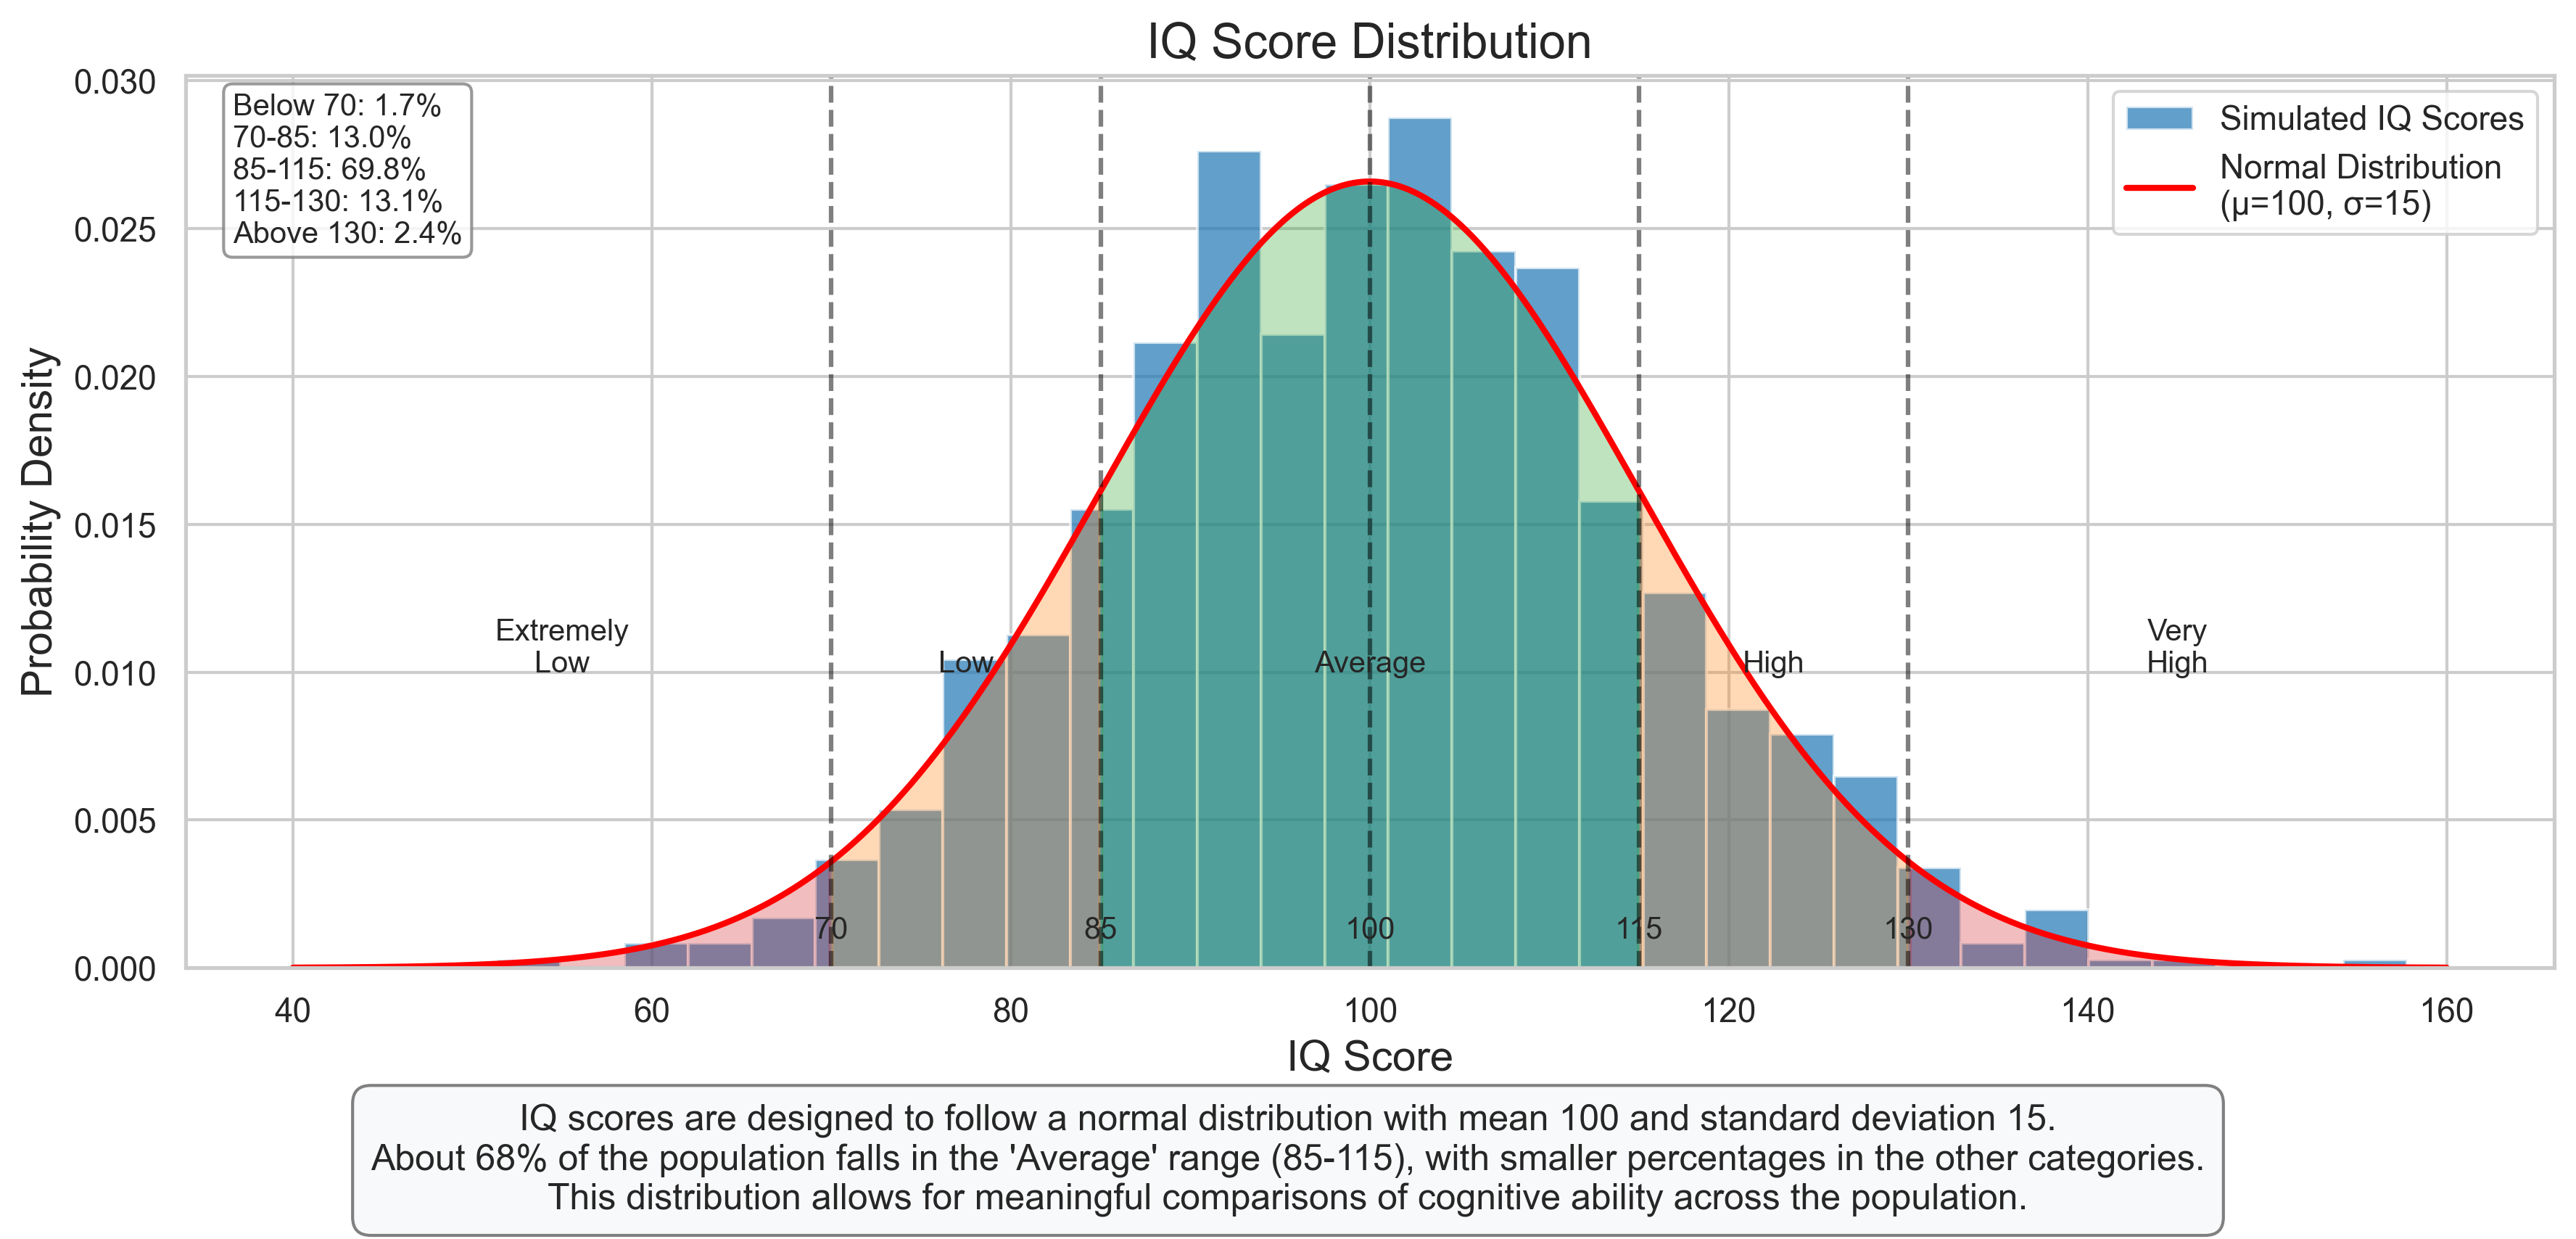

<Figure size 1920x1440 with 0 Axes>

In [15]:
# Modeling Test Scores
fig, ax = plt.subplots(figsize=(12, 6))


# Generate IQ scores (normally distributed with mean=100, sd=15)
np.random.seed(42)

iq_scores = np.random.normal(100, 15, 1000)

# Plot histogram
ax.hist(iq_scores, bins=30, alpha=0.7, color='#1f77b4', density=True, label='Simulated IQ Scores')


# Plot normal distribution curve
x = np.linspace(40, 160, 1000)
pdf = stats.norm.pdf(x, 100, 15)
ax.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution\n(μ=100, σ=15)')


# Add vertical lines for standard deviations
for i, label in zip([-2, -1, 0, 1, 2], ['70', '85', '100', '115', '130']):
    ax.axvline(100 + i*15, color='k', linestyle='--', alpha=0.5)
    ax.text(100 + i*15, 0.001, label, ha='center', fontsize=10)

# Add labels for IQ classifications
classifications = [
    (40, 70, 'Extremely\nLow', '#d62728'),

    (70, 85, 'Low', '#ff7f0e'),
    (85, 115, 'Average', '#2ca02c'),
    (115, 130, 'High', '#ff7f0e'),

    (130, 160, 'Very\nHigh', '#d62728')
]


for start, end, label, color in classifications:
    ax.fill_between(x[(x >= start) & (x <= end)], 0, pdf[(x >= start) & (x <= end)], 
                   alpha=0.3, color=color)
    ax.text((start + end) / 2, 0.01, label, ha='center', fontsize=10)

# Calculate percentages in each category
percentages = [
    ("Below 70", np.mean(iq_scores < 70) * 100),
    ("70-85", np.mean((iq_scores >= 70) & (iq_scores < 85)) * 100),
    ("85-115", np.mean((iq_scores >= 85) & (iq_scores <= 115)) * 100),
    ("115-130", np.mean((iq_scores > 115) & (iq_scores <= 130)) * 100),
    ("Above 130", np.mean(iq_scores > 130) * 100)
]

# Add a table with percentages
table_text = "\n".join([f"{label}: {pct:.1f}%" for label, pct in percentages])
ax.text(0.02, 0.98, table_text, transform=ax.transAxes, fontsize=10, va='top',
       bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add labels and title
ax.set_title('IQ Score Distribution', fontsize=16)
ax.set_xlabel('IQ Score', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.legend()

# Add explanatory text
plt.figtext(0.5, 0.01, "IQ scores are designed to follow a normal distribution with mean 100 and standard deviation 15.\n"
                      "About 68% of the population falls in the 'Average' range (85-115), with smaller percentages in the other categories.\n"
                      "This distribution allows for meaningful comparisons of cognitive ability across the population.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

#Add explanatory text
plt.figtext(0.5, 0.01, "The Central Limit Theorem in action: For each population distribution (left column),\n"
                      "the sampling distribution of the mean (columns 2-4) becomes more normal as sample size increases.\n"
                      "This holds true regardless of the shape of the original population distribution.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.subplots_adjust(top=0.92)
plt.show()

### 5.2 Signal Detection Theory

Signal Detection Theory (SDT) uses probability distributions to model how people distinguish between signal (target stimulus) and noise (background or non-target stimulus).

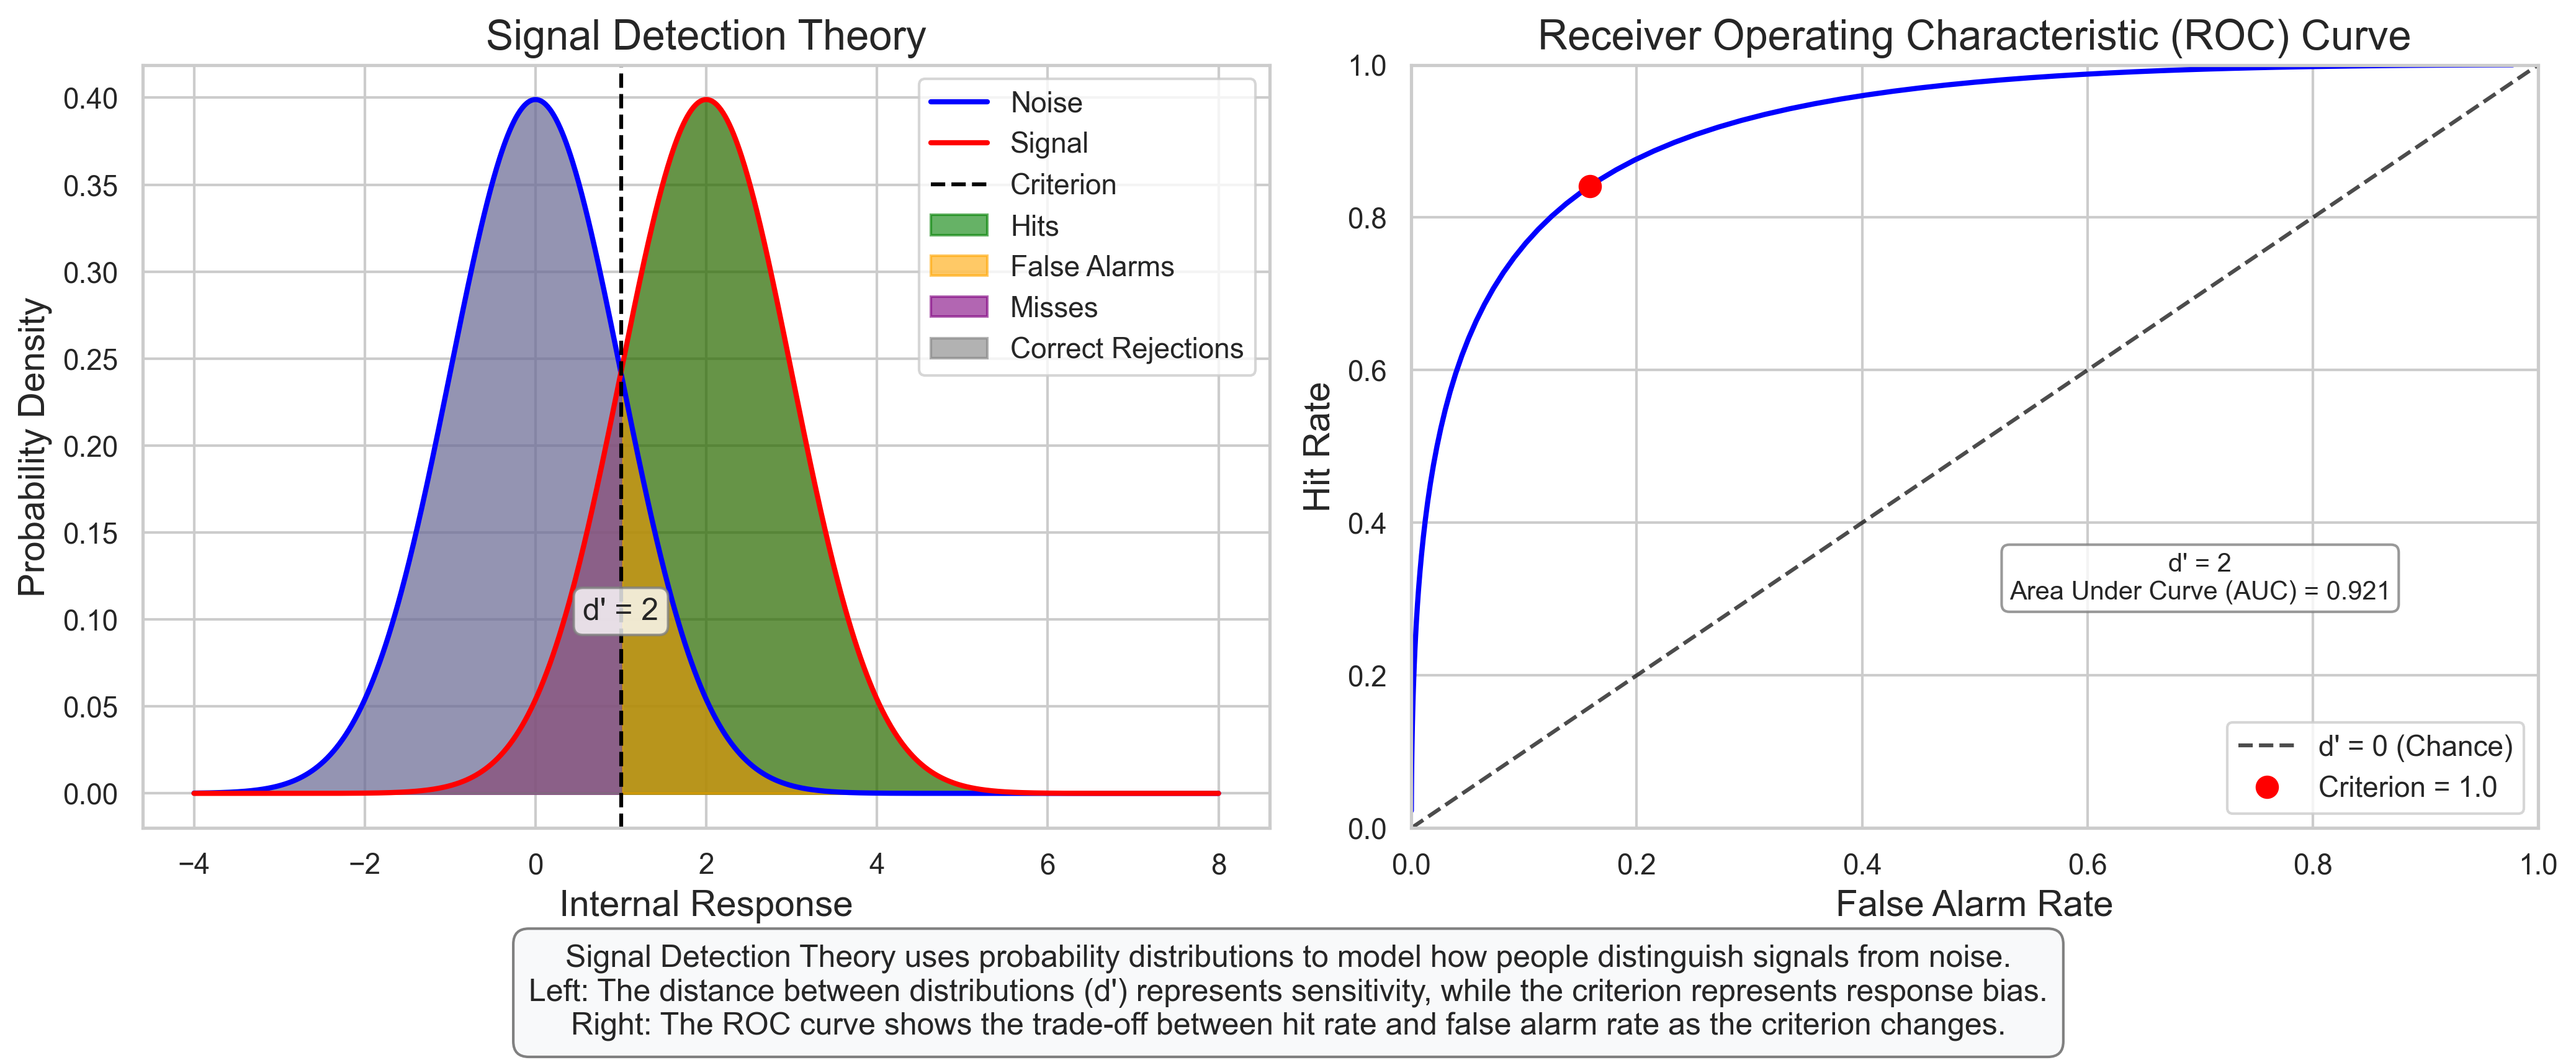

In [16]:
# Signal Detection Theory
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Signal Detection Theory Distributions
x = np.linspace(-4, 8, 1000)

# Noise distribution
noise_mean = 0
noise_std = 1
noise_pdf = stats.norm.pdf(x, noise_mean, noise_std)

# Signal distribution
d_prime = 2  # Sensitivity index
signal_mean = noise_mean + d_prime
signal_std = noise_std
signal_pdf = stats.norm.pdf(x, signal_mean, signal_std)

# Plot distributions
axes[0].plot(x, noise_pdf, 'b-', linewidth=2, label='Noise')
axes[0].plot(x, signal_pdf, 'r-', linewidth=2, label='Signal')
axes[0].fill_between(x, 0, noise_pdf, alpha=0.3, color='blue')
axes[0].fill_between(x, 0, signal_pdf, alpha=0.3, color='red')

# Add criterion line
criterion = 1.0
axes[0].axvline(criterion, color='k', linestyle='--', label='Criterion')

# Shade regions for hits, false alarms, misses, and correct rejections
# Hits: Signal > Criterion
axes[0].fill_between(x[x >= criterion], 0, signal_pdf[x >= criterion], alpha=0.6, color='green', label='Hits')
# False Alarms: Noise > Criterion
axes[0].fill_between(x[x >= criterion], 0, noise_pdf[x >= criterion], alpha=0.6, color='orange', label='False Alarms')
# Misses: Signal < Criterion
axes[0].fill_between(x[x < criterion], 0, signal_pdf[x < criterion], alpha=0.6, color='purple', label='Misses')
# Correct Rejections: Noise < Criterion
axes[0].fill_between(x[x < criterion], 0, noise_pdf[x < criterion], alpha=0.6, color='gray', label='Correct Rejections')

# Add labels and title
axes[0].set_title('Signal Detection Theory', fontsize=16)
axes[0].set_xlabel('Internal Response', fontsize=14)
axes[0].set_ylabel('Probability Density', fontsize=14)
axes[0].legend(loc='upper right')

# Add d' annotation
axes[0].annotate(f"d' = {d_prime}", xy=((noise_mean + signal_mean)/2, 0.05), 
                xytext=((noise_mean + signal_mean)/2, 0.1),
                ha='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Plot 2: ROC Curve
# Calculate hit rates and false alarm rates for different criterion values
criterion_values = np.linspace(-2, 4, 100)
hit_rates = [1 - stats.norm.cdf(c, signal_mean, signal_std) for c in criterion_values]
fa_rates = [1 - stats.norm.cdf(c, noise_mean, noise_std) for c in criterion_values]

# Plot ROC curve
axes[1].plot(fa_rates, hit_rates, 'b-', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.7, label="d' = 0 (Chance)")

# Mark the current criterion point
current_hit_rate = 1 - stats.norm.cdf(criterion, signal_mean, signal_std)
current_fa_rate = 1 - stats.norm.cdf(criterion, noise_mean, noise_std)
axes[1].plot(current_fa_rate, current_hit_rate, 'ro', markersize=8, label=f'Criterion = {criterion}')

# Add labels and title
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
axes[1].set_xlabel('False Alarm Rate', fontsize=14)
axes[1].set_ylabel('Hit Rate', fontsize=14)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].legend()

# Add annotation about d'
axes[1].annotate(f"d' = {d_prime}\nArea Under Curve (AUC) = {stats.norm.cdf(d_prime/np.sqrt(2)):.3f}", 
                xy=(0.7, 0.3), xytext=(0.7, 0.3),
                ha='center', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add explanatory text
plt.figtext(0.5, 0.01, "Signal Detection Theory uses probability distributions to model how people distinguish signals from noise.\n"
                      "Left: The distance between distributions (d') represents sensitivity, while the criterion represents response bias.\n"
                      "Right: The ROC curve shows the trade-off between hit rate and false alarm rate as the criterion changes.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

### 5.3 Power Analysis

Power analysis uses probability distributions to determine the likelihood of detecting an effect of a given size with a specific sample size.

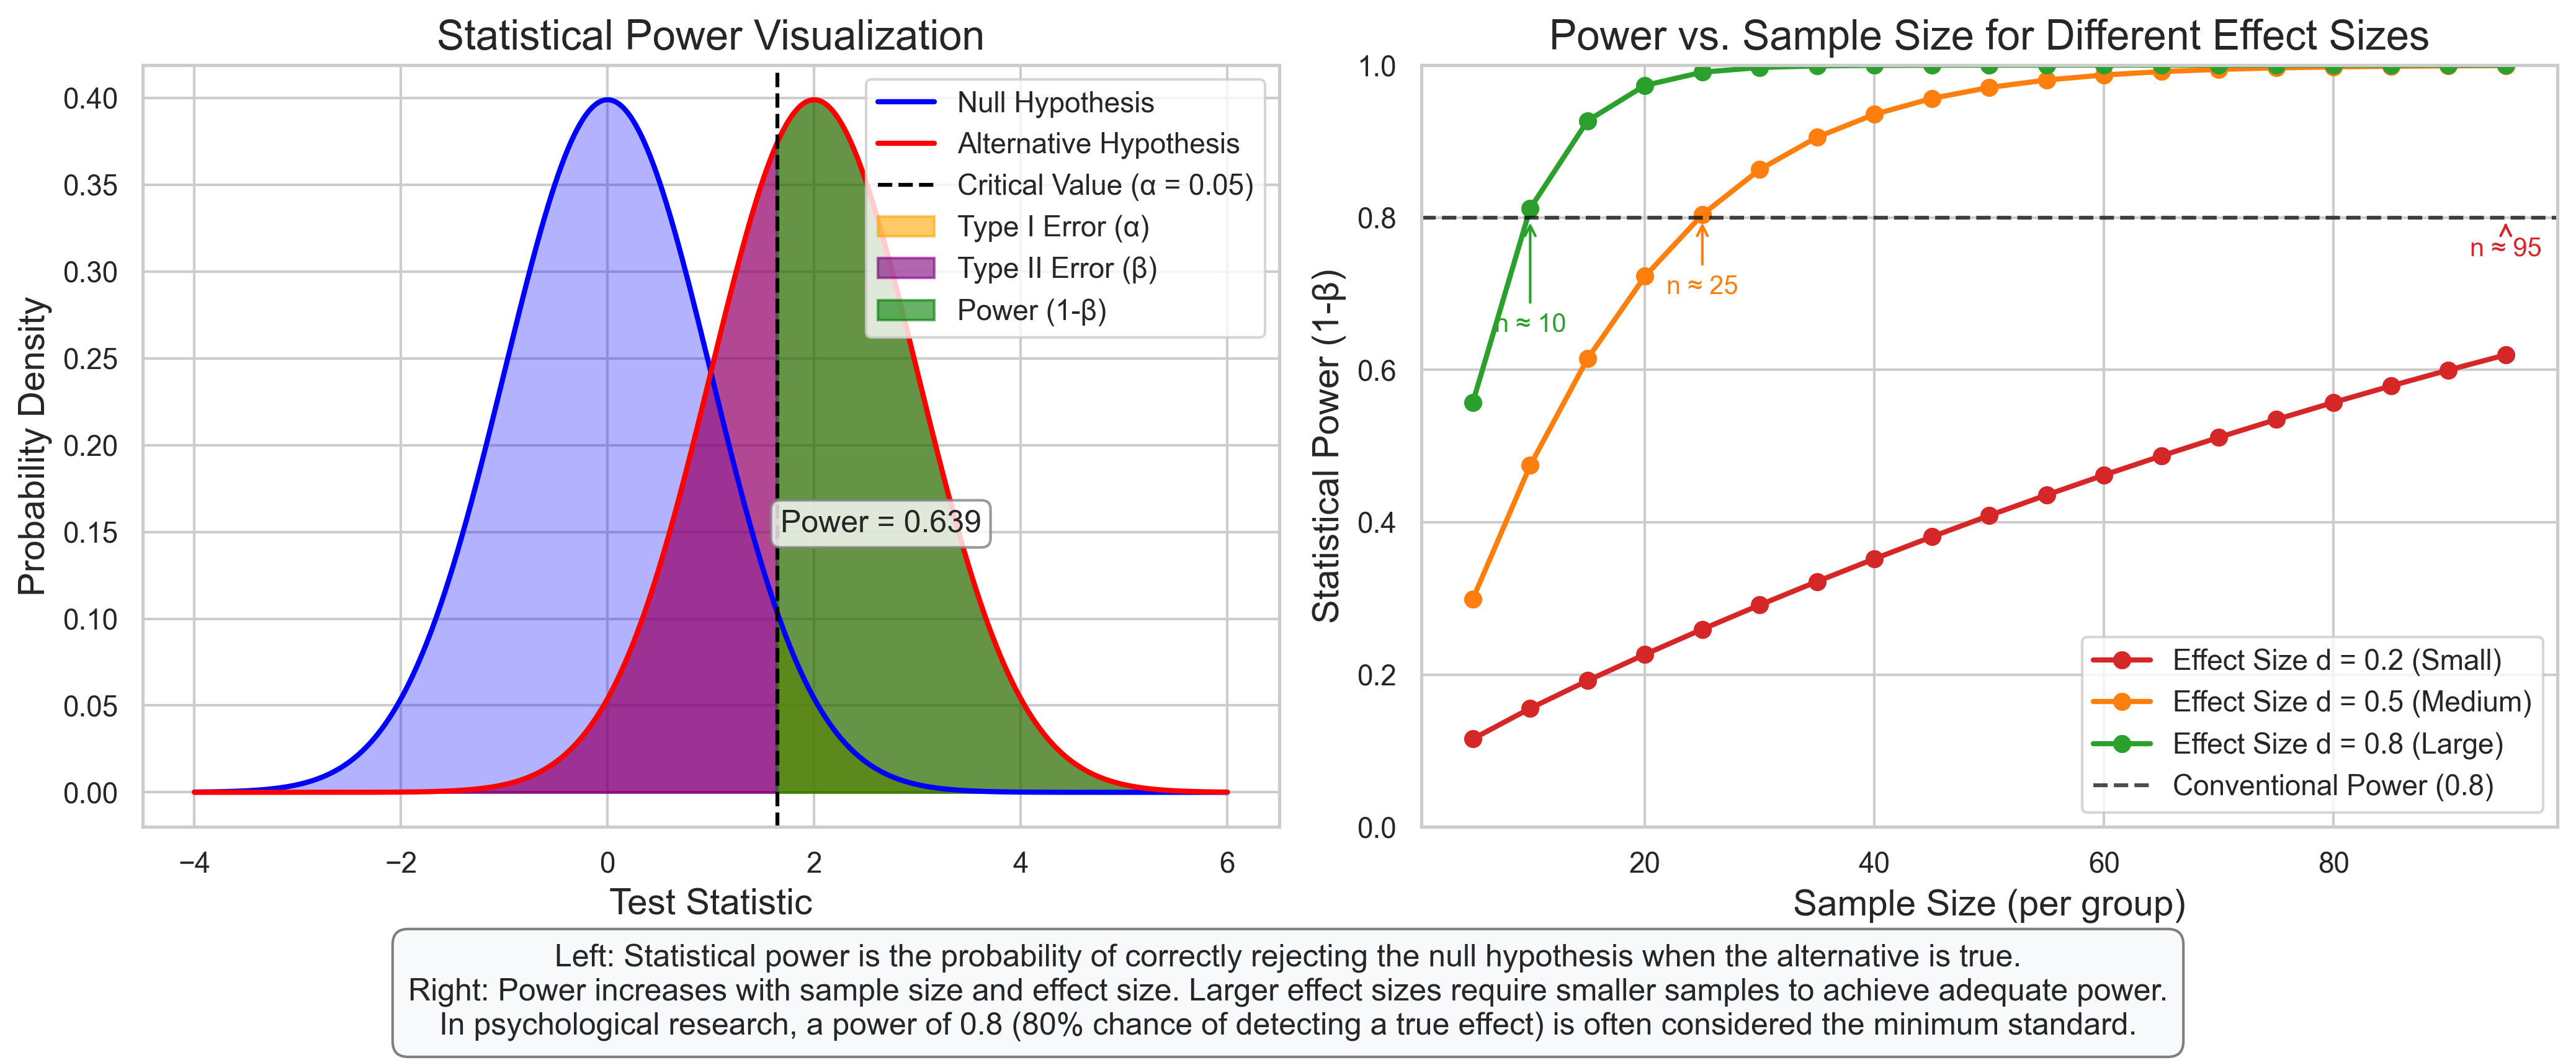

In [17]:
# Power Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Visualizing Statistical Power
x = np.linspace(-4, 6, 1000)

# Null distribution (centered at 0)
null_mean = 0
null_std = 1
null_pdf = stats.norm.pdf(x, null_mean, null_std)

# Alternative distribution (effect size d = 2)
effect_size = 2
alt_mean = null_mean + effect_size
alt_std = null_std
alt_pdf = stats.norm.pdf(x, alt_mean, alt_std)

# Plot distributions
axes[0].plot(x, null_pdf, 'b-', linewidth=2, label='Null Hypothesis')
axes[0].plot(x, alt_pdf, 'r-', linewidth=2, label='Alternative Hypothesis')
axes[0].fill_between(x, 0, null_pdf, alpha=0.3, color='blue')
axes[0].fill_between(x, 0, alt_pdf, alpha=0.3, color='red')

# Add critical value line (alpha = 0.05, one-tailed)
critical_value = stats.norm.ppf(0.95, null_mean, null_std)
axes[0].axvline(critical_value, color='k', linestyle='--', label='Critical Value (α = 0.05)')

# Shade regions for Type I error, Type II error, and Power
# Type I error: Null > Critical Value
axes[0].fill_between(x[(x >= critical_value)], 0, null_pdf[(x >= critical_value)], 
                   alpha=0.6, color='orange', label='Type I Error (α)')

# Type II error: Alt < Critical Value
axes[0].fill_between(x[(x < critical_value)], 0, alt_pdf[(x < critical_value)], 
                   alpha=0.6, color='purple', label='Type II Error (β)')

# Power: Alt > Critical Value
power_region = alt_pdf[(x >= critical_value)]
axes[0].fill_between(x[(x >= critical_value)], 0, power_region, 
                   alpha=0.6, color='green', label='Power (1-β)')

# Calculate power
power = 1 - stats.norm.cdf(critical_value, alt_mean, alt_std)

# Add labels and title
axes[0].set_title('Statistical Power Visualization', fontsize=16)
axes[0].set_xlabel('Test Statistic', fontsize=14)
axes[0].set_ylabel('Probability Density', fontsize=14)
axes[0].legend(loc='upper right')

# Add power annotation
axes[0].annotate(f"Power = {power:.3f}", xy=(critical_value + 1, 0.15), 
                xytext=(critical_value + 1, 0.15),
                ha='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Plot 2: Power vs. Sample Size
# Calculate power for different sample sizes and effect sizes
sample_sizes = np.arange(5, 100, 5)
effect_sizes = [0.2, 0.5, 0.8]  # Small, medium, large
colors = ['#d62728', '#ff7f0e', '#2ca02c']

for i, d in enumerate(effect_sizes):
    # Calculate power for each sample size
    powers = []
    for n in sample_sizes:
        # Standard error decreases with sqrt(n)
        se = 1 / np.sqrt(n)
        # Critical value in standardized units
        cv = stats.norm.ppf(0.95)
        # Non-centrality parameter
        ncp = d * np.sqrt(n)
        # Power calculation
        power = 1 - stats.norm.cdf(cv - ncp)
        powers.append(power)
    
    axes[1].plot(sample_sizes, powers, 'o-', color=colors[i], 
                label=f'Effect Size d = {d} ({["Small", "Medium", "Large"][i]})', linewidth=2)

# Add horizontal line at 0.8 power
axes[1].axhline(0.8, color='k', linestyle='--', alpha=0.7, label='Conventional Power (0.8)')

# Add labels and title
axes[1].set_title('Power vs. Sample Size for Different Effect Sizes', fontsize=16)
axes[1].set_xlabel('Sample Size (per group)', fontsize=14)
axes[1].set_ylabel('Statistical Power (1-β)', fontsize=14)
axes[1].set_ylim(0, 1)
axes[1].legend()

# Add annotation about required sample sizes
for i, d in enumerate(effect_sizes):
    # Find approximate sample size for power = 0.8
    powers = np.array([1 - stats.norm.cdf(stats.norm.ppf(0.95) - d * np.sqrt(n)) for n in sample_sizes])
    idx = np.argmin(np.abs(powers - 0.8))
    if powers[idx] >= 0.8:
        n_required = sample_sizes[idx]
    else:
        n_required = sample_sizes[idx + 1] if idx + 1 < len(sample_sizes) else sample_sizes[idx]
    
    axes[1].annotate(f"n ≈ {n_required}", 
                    xy=(n_required, 0.8), 
                    xytext=(n_required, 0.8 - 0.05 * (i+1)),
                    ha='center', fontsize=10, color=colors[i],
                    arrowprops=dict(arrowstyle='->', color=colors[i]))

# Add explanatory text
plt.figtext(0.5, 0.01, "Left: Statistical power is the probability of correctly rejecting the null hypothesis when the alternative is true.\n"
                      "Right: Power increases with sample size and effect size. Larger effect sizes require smaller samples to achieve adequate power.\n"
                      "In psychological research, a power of 0.8 (80% chance of detecting a true effect) is often considered the minimum standard.", 
           ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="#f8f9fa", ec="gray"))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## 6. Summary and Key Takeaways

In this chapter, we've explored various probability distributions and their applications in psychological research. Here are the key takeaways:

### Discrete Distributions
- **Bernoulli Distribution**: Models a single binary outcome (success/failure)
- **Binomial Distribution**: Models the number of successes in a fixed number of independent trials
- **Poisson Distribution**: Models the number of events occurring in a fixed interval

### Continuous Distributions
- **Normal Distribution**: Bell-shaped, symmetric distribution often used to model natural phenomena
- **t-Distribution**: Similar to normal but with heavier tails, used when population standard deviation is unknown
- **Chi-Square Distribution**: Used for goodness-of-fit tests and analyzing variances
- **F-Distribution**: Used in ANOVA and for comparing variances

### Sampling Distributions and Statistical Inference
- **Central Limit Theorem**: The sampling distribution of the mean approaches a normal distribution as sample size increases
- **Confidence Intervals**: Provide a range of plausible values for population parameters
- **Statistical Power**: The probability of correctly rejecting a false null hypothesis

### Applications in Psychology
- Modeling test scores and psychological measurements
- Signal Detection Theory for understanding perceptual decision-making
- Power analysis for research design and sample size determination

Understanding probability distributions is essential for statistical inference, hypothesis testing, and interpreting research findings in psychology. These mathematical tools allow researchers to quantify uncertainty, make predictions, and draw conclusions from data.

## 7. Practice Problems

1. A psychological test has 20 multiple-choice questions, each with 4 options. If a student guesses randomly on all questions, what is the probability that they will get exactly 5 questions correct? What is the probability of getting at least 10 correct?

2. In a memory experiment, participants are shown a list of 15 words and asked to recall as many as possible. If the probability of recalling any individual word is 0.6, what is the expected number of words recalled? What is the standard deviation?

3. A researcher is studying reaction times to a stimulus. Based on previous research, reaction times are normally distributed with a mean of 250 ms and a standard deviation of 40 ms. What percentage of participants would be expected to have reaction times:
   a. Less than 200 ms?
   b. Between 230 ms and 270 ms?
   c. Greater than 350 ms?

4. A researcher wants to test whether a new therapy reduces anxiety scores. The population standard deviation is unknown. If they want to detect a medium effect size (d = 0.5) with 80% power using a two-tailed test with α = 0.05, approximately how many participants do they need in each group?

5. In a signal detection experiment, a participant has a hit rate of 0.7 and a false alarm rate of 0.2. Calculate d' for this participant. What does this value tell you about their sensitivity?

6. A researcher collects IQ scores from a sample of 25 participants and finds a mean of 105 with a standard deviation of 15. Calculate a 95% confidence interval for the population mean. Interpret this interval.

7. The Central Limit Theorem states that the sampling distribution of the mean approaches a normal distribution as sample size increases. Explain why this is important for statistical inference in psychological research, especially when the original population distribution is not normal.